# Simulation and Analysis of Game of Life

In [63]:
import numpy as np
import copy
import pandas as pd
import scipy.stats as stats

from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter

In [64]:
# Define Tableau 10 Colors
tableau_colors = [
    (31, 119, 180),  # Blue
    (255, 127, 14),  # Orange
    (44, 160, 44),   # Green
    (214, 39, 40),   # Red
    (148, 103, 189), # Purple
    (140, 86, 75),   # Brown
    (227, 119, 194), # Pink
    (127, 127, 127), # Gray
    (188, 189, 34),  # Yellow
    (23, 190, 207),  # Cyan
]

# Normalize RGB values to range [0, 1]
tableau_colors = [(r / 255, g / 255, b / 255) for r, g, b in tableau_colors]

font = {'family': 'Georgia', 'color':  'black', 'weight': 'normal', 'size': 20}
title_font = {'family': 'Georgia', 'color':  'black', 'weight': 'bold', 'style': 'italic', 'size': 20}
suptitle_font = FontProperties(family='Georgia', weight='bold', size=22)
legend_font = FontProperties(family='Georgia', weight='normal', size=16)
tick_font = {'family': 'Georgia', 'size': 18}

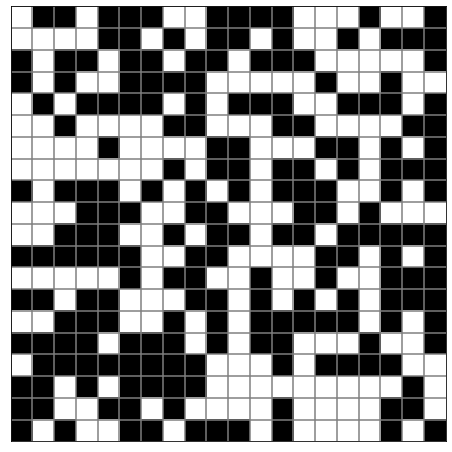

In [42]:
# Initial state library
size = 20
empty_grid = np.zeros((size, size))
init_loc = size // 2

bee_hive = copy.deepcopy(empty_grid)
bee_hive[init_loc,   init_loc]   = 1
bee_hive[init_loc,   init_loc+1] = 1
bee_hive[init_loc+1, init_loc-1] = 1
bee_hive[init_loc+1, init_loc+2] = 1
bee_hive[init_loc+2, init_loc]   = 1
bee_hive[init_loc+2, init_loc+1] = 1

toad = copy.deepcopy(empty_grid)
toad[init_loc+1, init_loc]   = 1
toad[init_loc+1, init_loc+1] = 1
toad[init_loc+1, init_loc+2] = 1
toad[init_loc+2, init_loc-1] = 1
toad[init_loc+2, init_loc]   = 1
toad[init_loc+2, init_loc+1] = 1

t_tetromino = copy.deepcopy(empty_grid)
t_tetromino[init_loc+1, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc]   = 1
t_tetromino[init_loc+2, init_loc+1] = 1
t_tetromino[init_loc+2, init_loc+2] = 1

glider = copy.deepcopy(empty_grid)
glider[init_loc,   init_loc]   = 1
glider[init_loc,   init_loc+1] = 1
glider[init_loc,   init_loc+2] = 1
glider[init_loc+1, init_loc]   = 1
glider[init_loc+2, init_loc+1] = 1

# Function to initialize the grid with random values
def random_grid(size, filling_factor=0.5):
    return np.random.choice([0, 1], size * size, p=[1-filling_factor, filling_factor]).reshape(size, size)

# Function to update the grid according to Conway's rules
def update_grid(grid):
    new_grid = grid.copy()
    size = grid.shape[0]
    
    for i in range(size):
        for j in range(size):
            left, right  = j - 1, j + 1
            top, bottom  = i - 1, i + 1
#             make the board infinite
            if i == 0:
                top = size - 1
            if i == size - 1:
                bottom = 0
            if j == 0:
                left = size - 1
            if j == size - 1:
                right = 0
            
            # Count the number of alive neighbors
            neighbors = [grid[top, left], grid[top, j], grid[top, right], \
                         grid[i, left], grid[i, right],\
                         grid[bottom, left], grid[bottom, j], grid[bottom, right]]
            num_alive = np.sum(neighbors)
            
            # Apply Conway's rules
            if grid[i, j] == 1:
                if num_alive < 2 or num_alive > 3:
                    new_grid[i, j] = 0
            else:
                if num_alive == 3:
                    new_grid[i, j] = 1

    return new_grid

# Function to update the animation
def update(frameNum, img, grid, size):
    new_grid = update_grid(grid)
    img.set_data(new_grid)
    grid[:] = new_grid
    return img

# Set the grid size and create the initial grid
grid = random_grid(size, filling_factor=0.5)
# grid = copy.deepcopy(bee_hive)
# grid = copy.deepcopy(toad)
# grid = copy.deepcopy(t_tetromino)
# grid = copy.deepcopy(glider)
# print(grid)

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))
img = ax.imshow(grid, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax.set_xticks([])
ax.set_yticks([])
for i in range(size):
    ax.axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax.axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')
plt.gcf().set_facecolor('white')

# Create an animation
# ani = animation.FuncAnimation(fig, update, fargs=(img, grid, size),
#                               frames=3000, interval=100, save_count=100)

# Save the animation to a GIF file
# ani.save('./animations/random.gif', writer='pillow', fps=10)

plt.savefig('./animations/example.png')
plt.show()


# Display the animation in the Jupyter Notebook
# HTML(ani.to_jshtml())

## Analysis - filling factor vs. stability

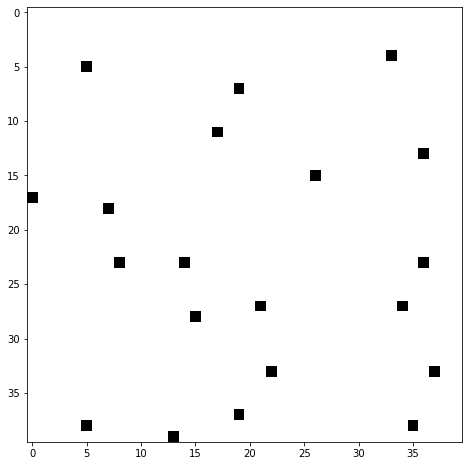

2
2
2
2
2
2
2
2
2
2


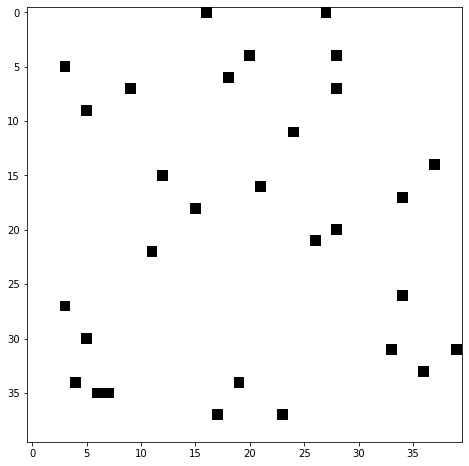

2
3
3
2
3
2
3
2
3
3


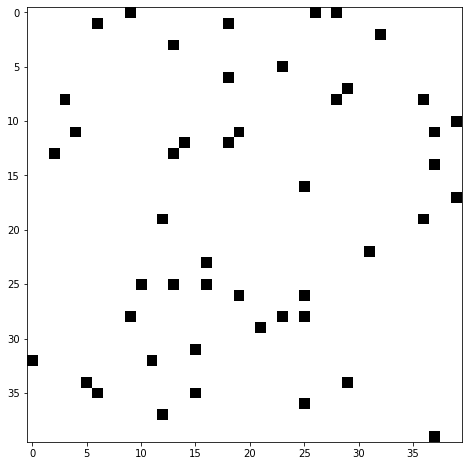

3
3
3
6
3
3
3
4
3
3


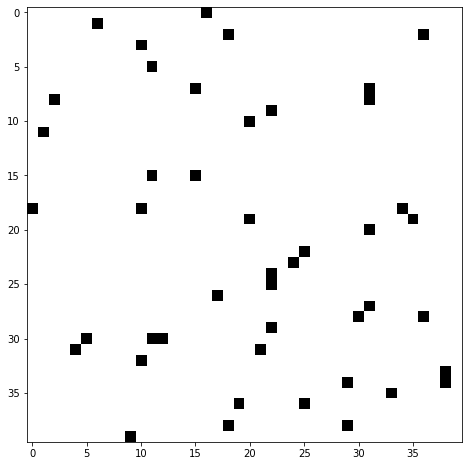

3
3
2
3
3
3
5
3
3
3


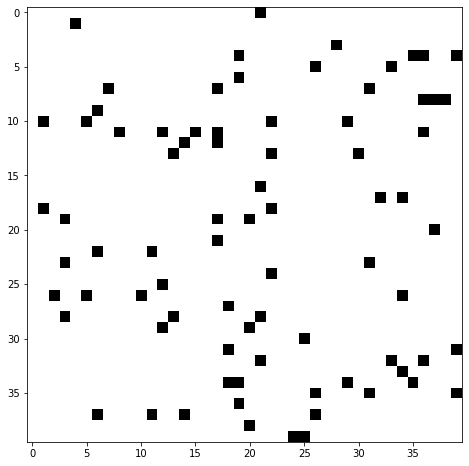

5
5
4
3
22
5
3
4
6
13


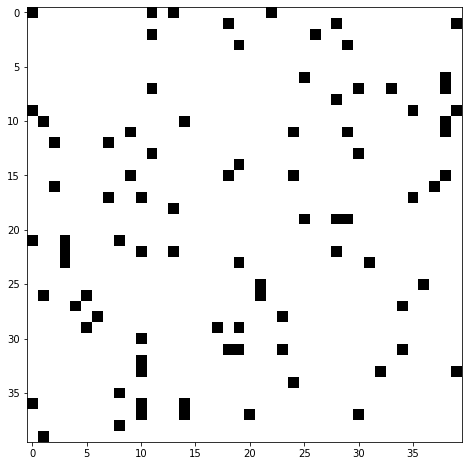

162
5
6
6
7
11
5
9
12
12


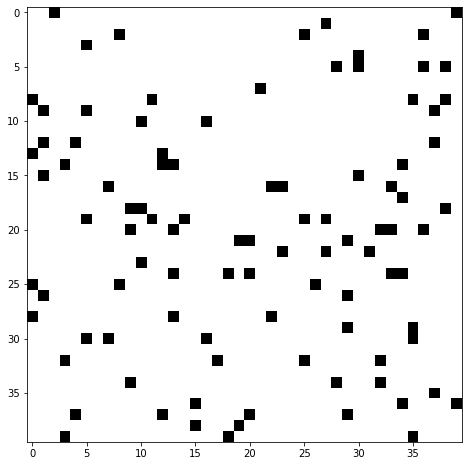

3
269
18
34
5
17
969
33
115
7


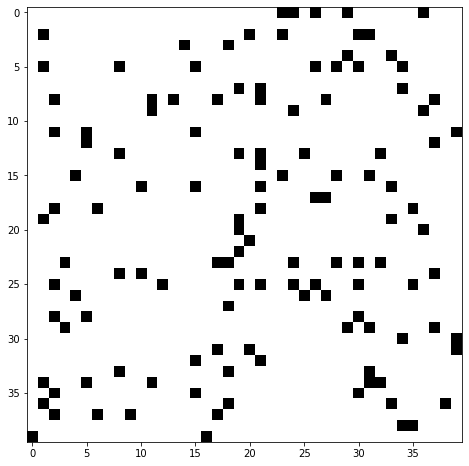

23
7
6
14
380
6
208
7
11
670


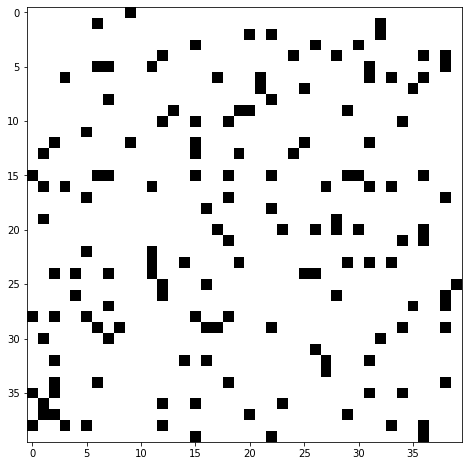

85
1372
402
68
223
409
46
1061
780
144


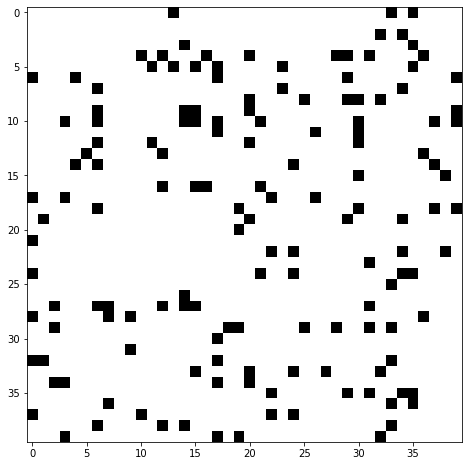

52
2007
14
547
134
517
188
292
1798
456


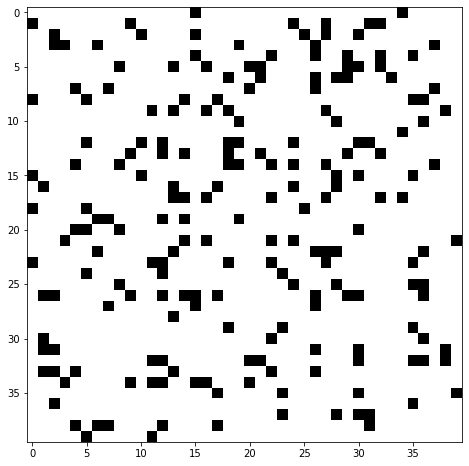

571
333
445
804
45
711
242
169
896
1583


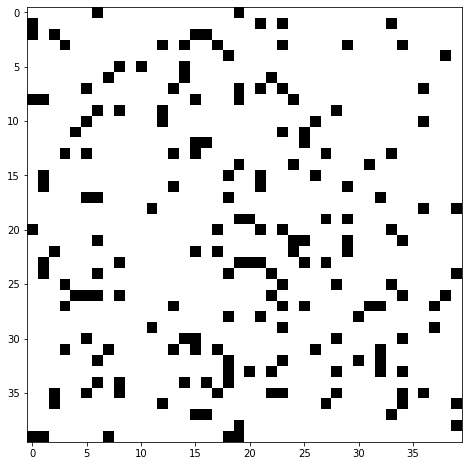

143
204
873
48
681
242
339
1248
981
1254


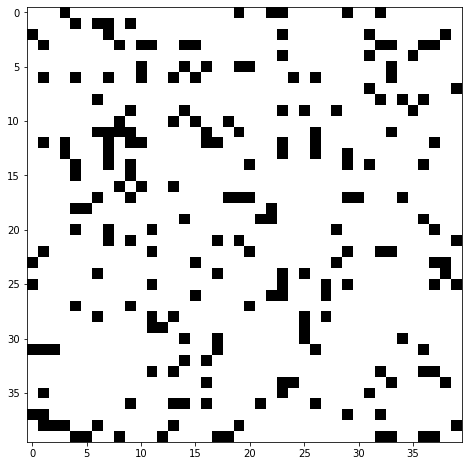

531
1005
255
145
863
24
1513
489
416
120


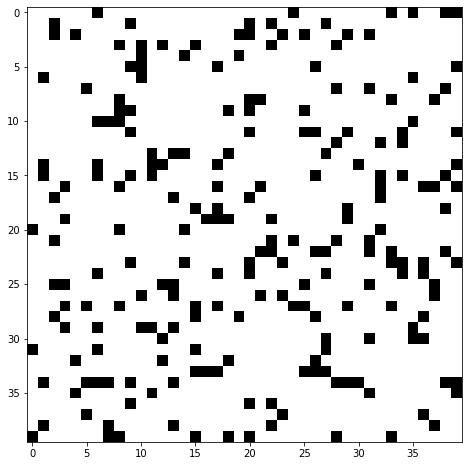

644
204
1769
539
340
1428
666
73
806
492


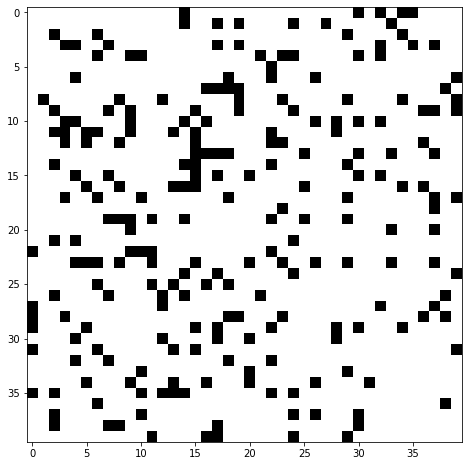

328
369
503
79
160
103
382
1112
806
587


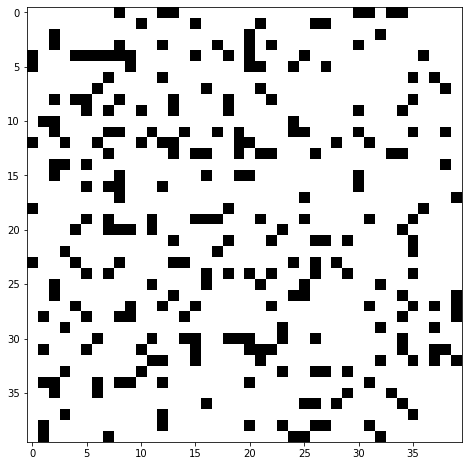

514
1226
899
1344
506
391
1355
472
636
1190


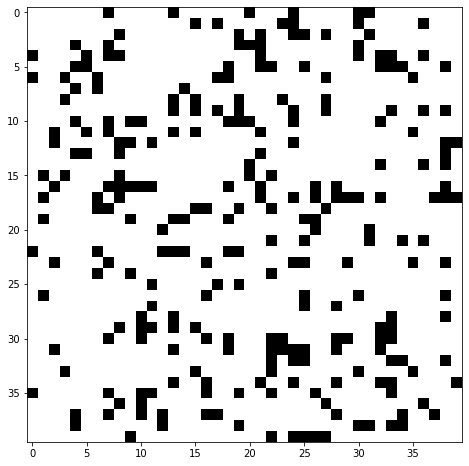

188
421
161
107
192
502
113
638
216
379


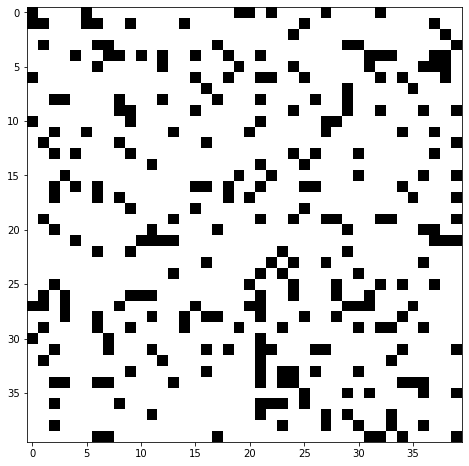

1106
3648
709
1054
744
196
544
323
734
1162


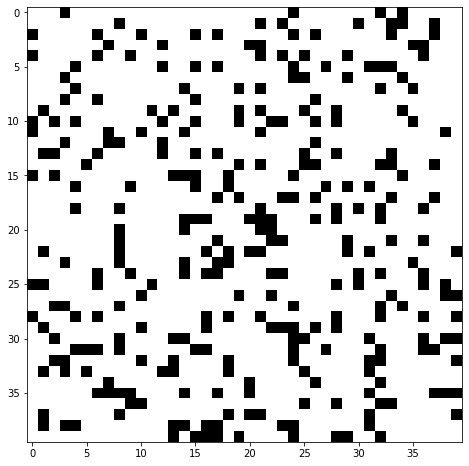

245
1489
1067
168
95
512
240
489
1111
212


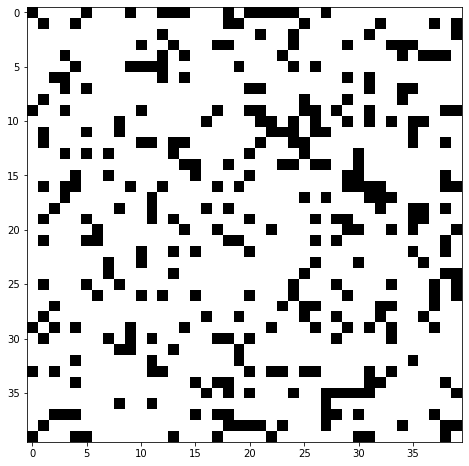

462
96
414
1092
359
804
480
936
908
1244


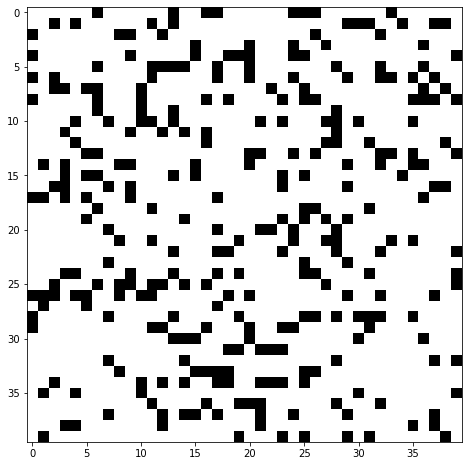

692
1672
750
365
998
405
1307
872
601
947


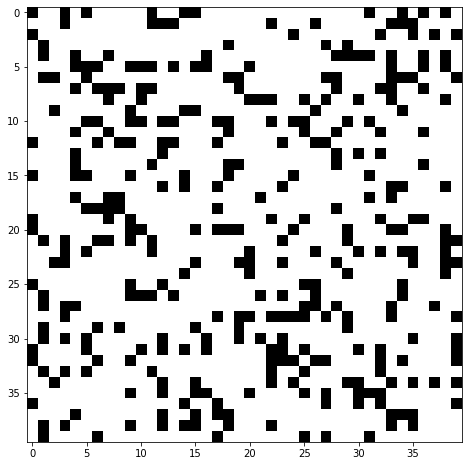

140
165
974
119
1683
471
403
297
308
508


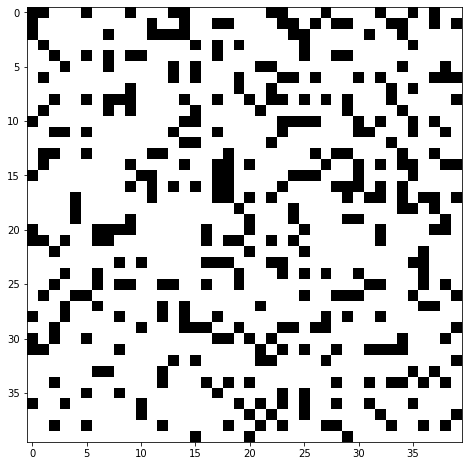

527
241
972
542
936
992
491
414
939
488


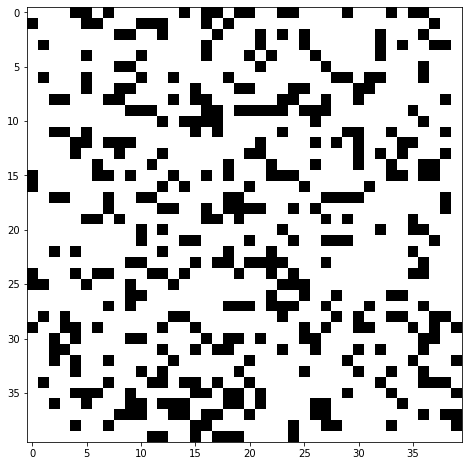

182
2090
341
800
968
551
493
192
260
354


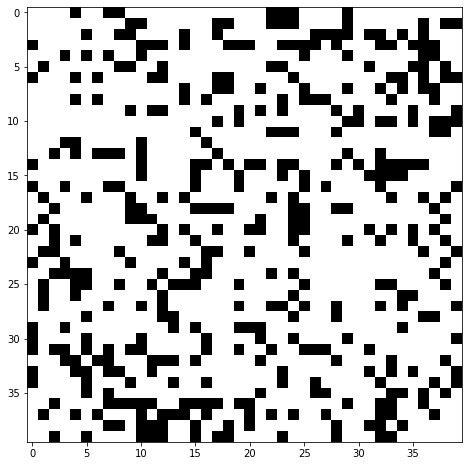

1291
1304
241
1590
156
471
618
526
452
471


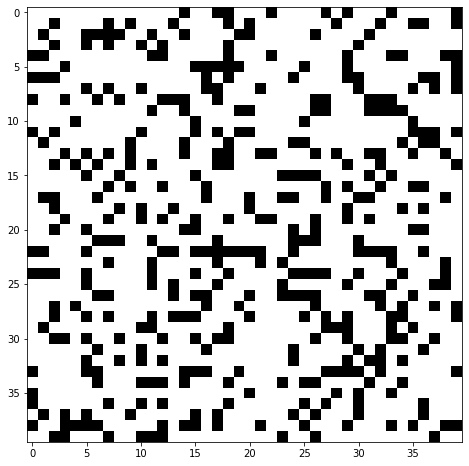

298
166
308
288
411
259
749
269
555
726


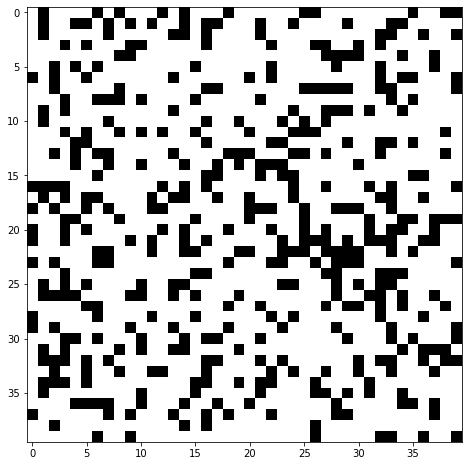

593
1049
778
279
898
285
362
279
410
370


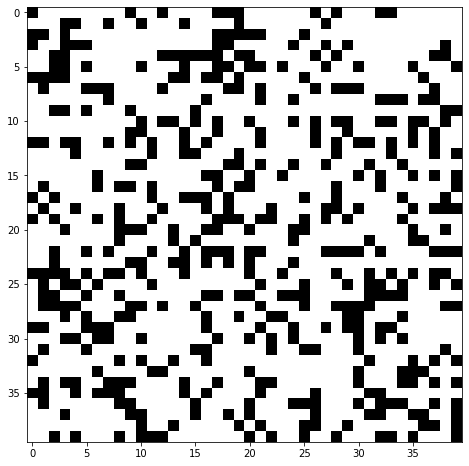

329
466
175
347
1050
744
456
569
596
505


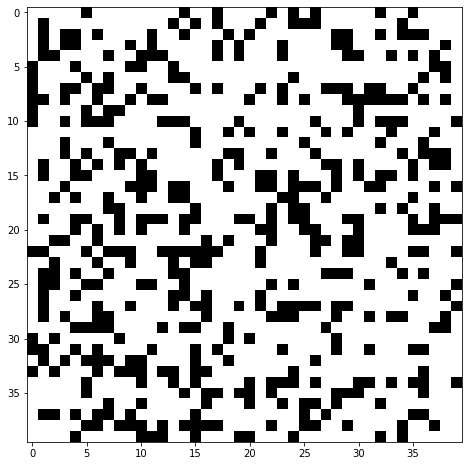

809
607
382
747
387
164
771
295
191
472


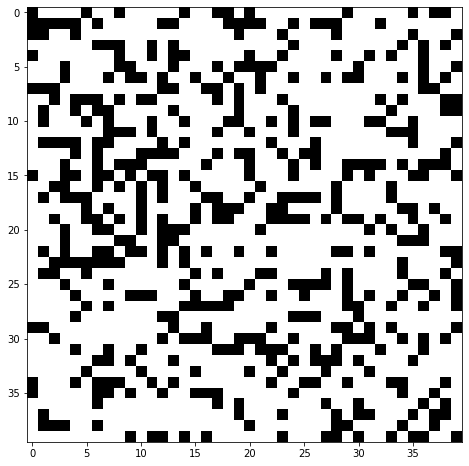

844
578
190
228
440
218
206
920
656
352


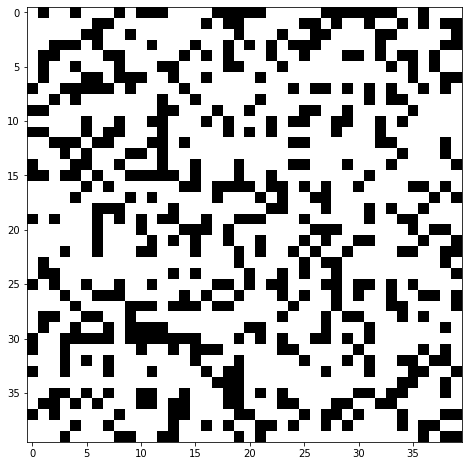

527
507
134
400
397
834
462
253
564
562


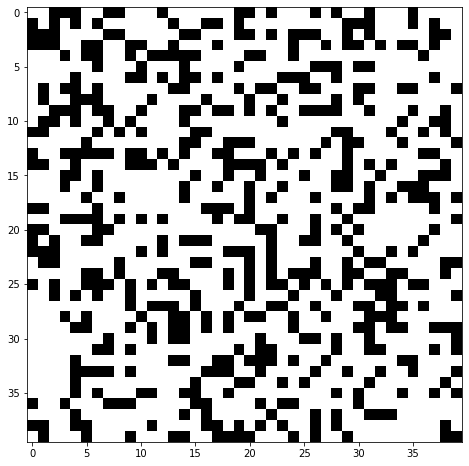

207
505
494
187
507
490
542
515
1003
1065


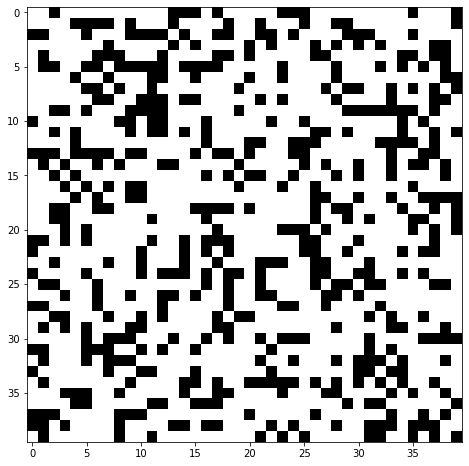

803
416
668
328
592
867
1015
827
454
795


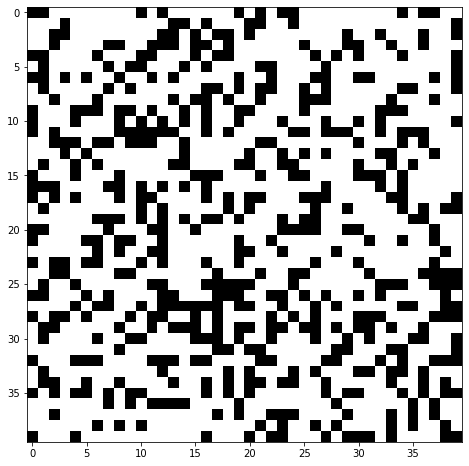

926
394
1522
833
1374
177
285
1917
504
1053


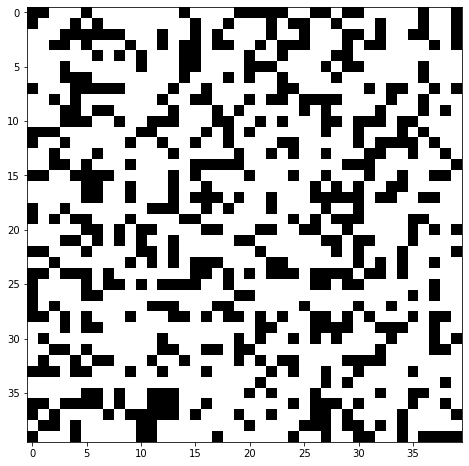

488
183
205
675
210
680
367
1140
361
967


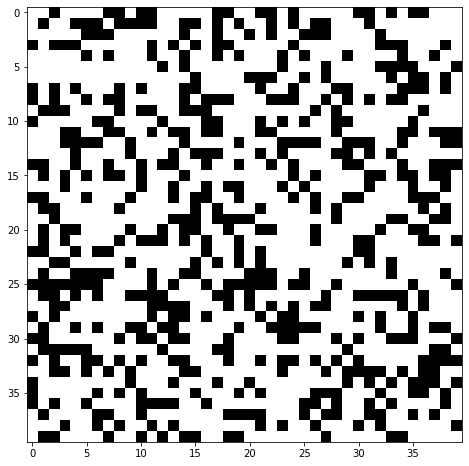

2198
656
455
379
894
629
1634
306
297
466


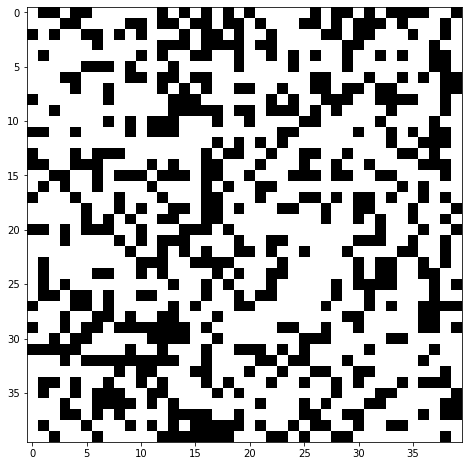

138
1372
551
1976
1082
478
374
364
343
511


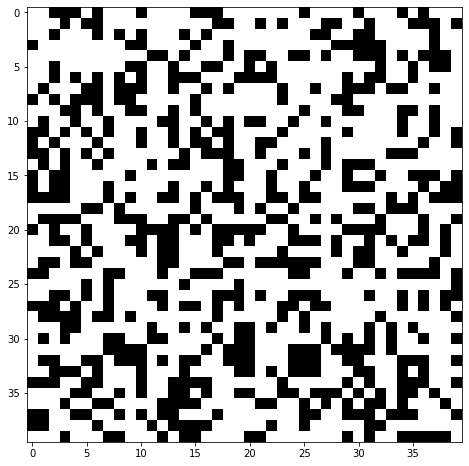

452
729
232
2049
455
592
750
1232
649
793


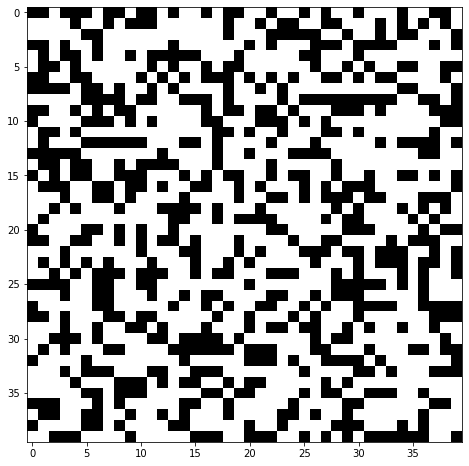

171
1280
221
981
762
129
375
1012
192
351


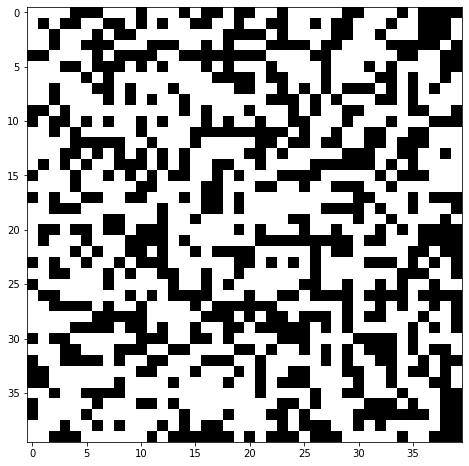

295
925
427
836
1057
310
636
862
335
865


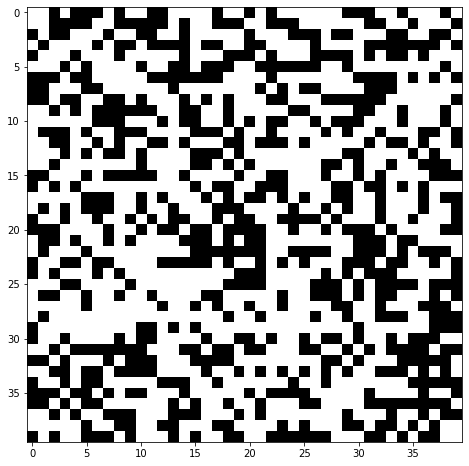

808
298
1633
635
508
240
643
630
536
1262


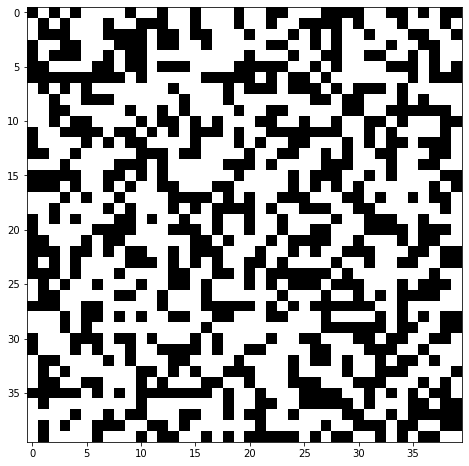

477
493
1699
693
148
654
877
665
287
2045


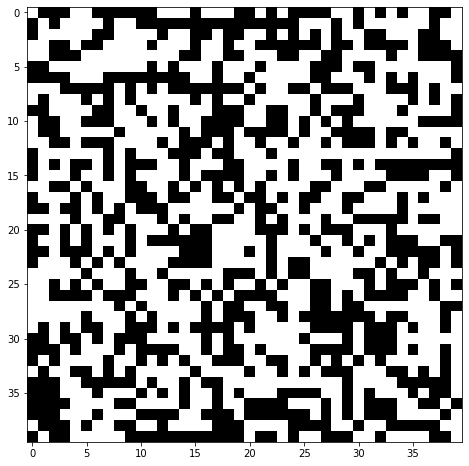

378
196
411
202
162
261
233
1214
244
388


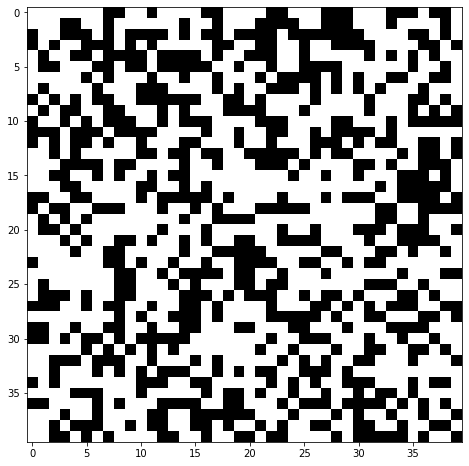

235
169
478
437
654
1056
846
433
1368
242


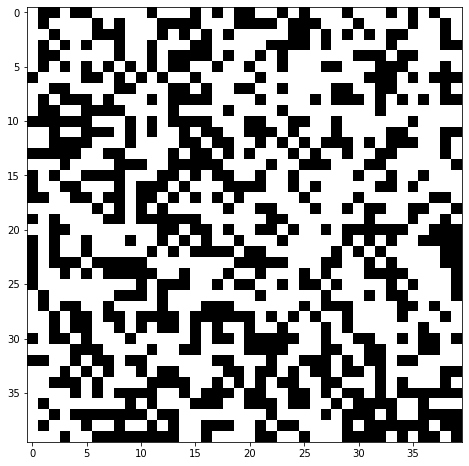

333
712
179
1658
615
110
592
404
460
320


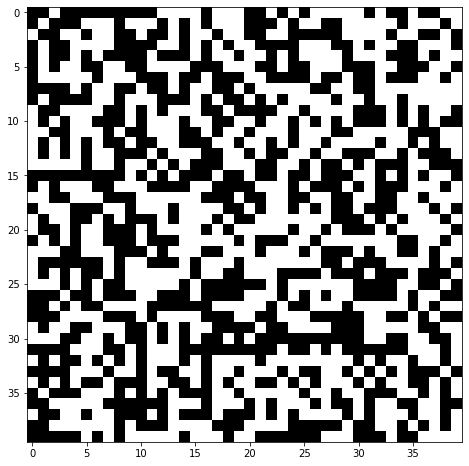

594
440
677
405
466
1811
318
363
301
250


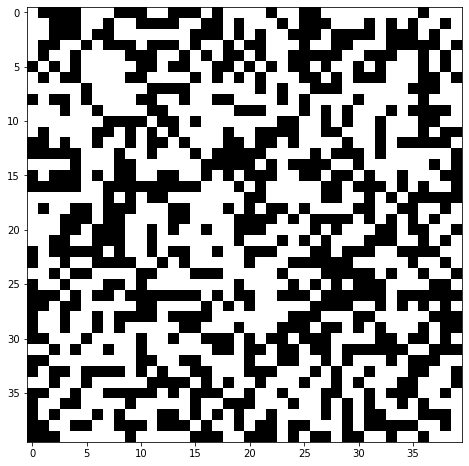

209
1086
1290
408
1414
1426
340
310
126
513


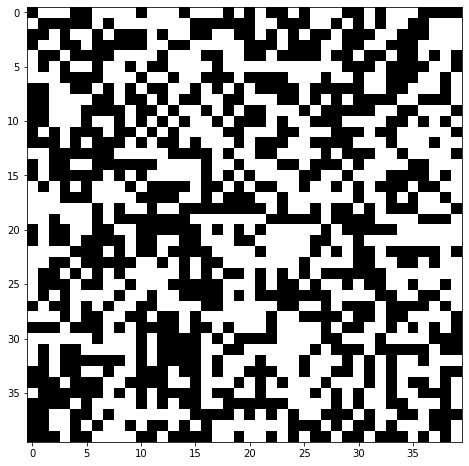

1115
1227
928
280
319
890
161
320
1623
473


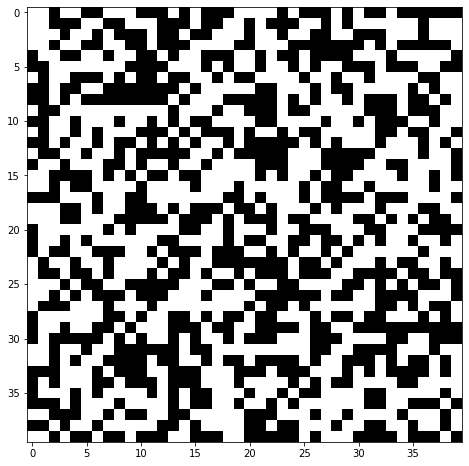

2659
323
700
150
193
385
894
1147
603
1747


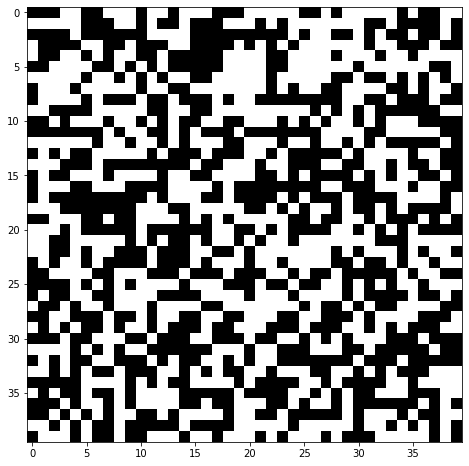

252
153
175
683
1175
423
117
354
375
405


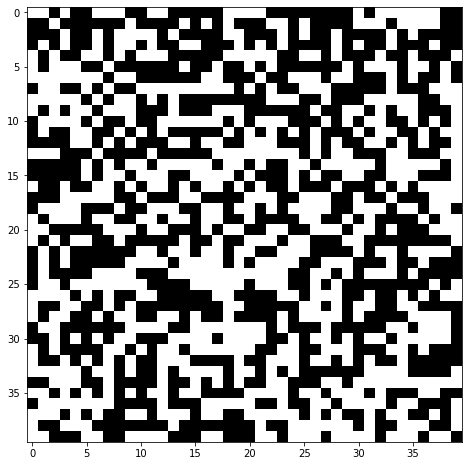

846
166
150
2023
661
1404
269
238
301
259


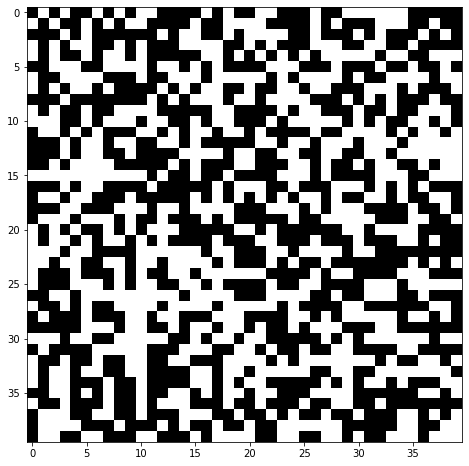

412
193
253
190
455
432
330
267
1252
495


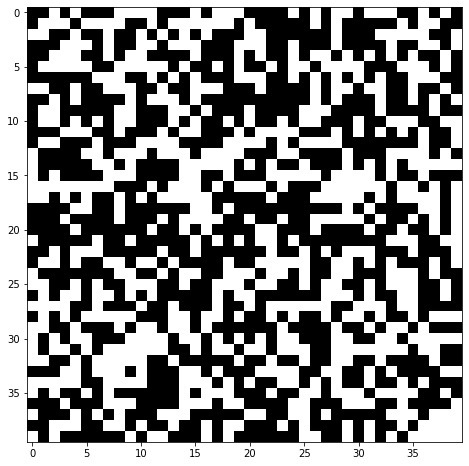

236
237
755
2109
786
2177
1086
188
454
760


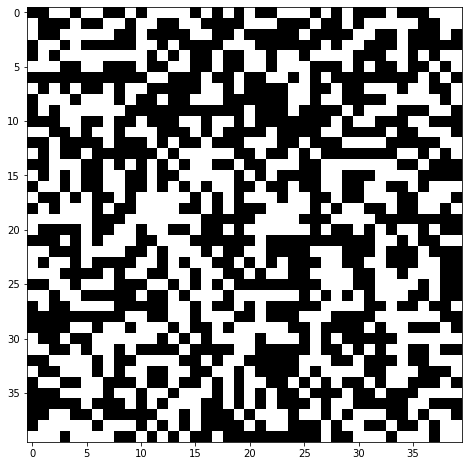

1303
1261
353
102
1331
646
754
390
146
553


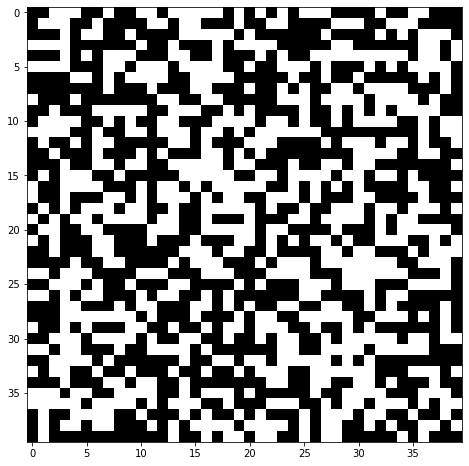

412
456
1282
178
362
383
194
134
350
192


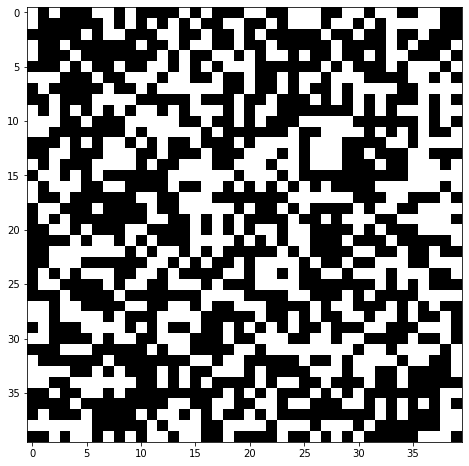

458
529
851
2231
290
1438
482
376
596
196


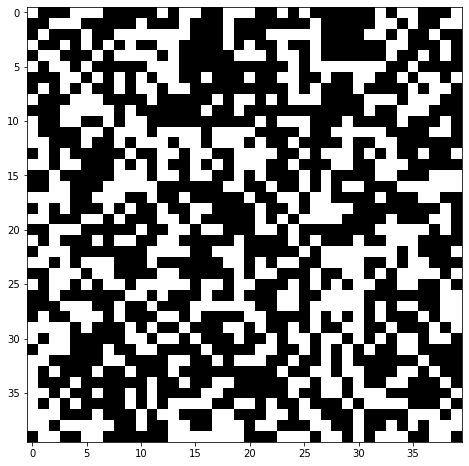

632
554
457
918
752
501
322
319
112
231


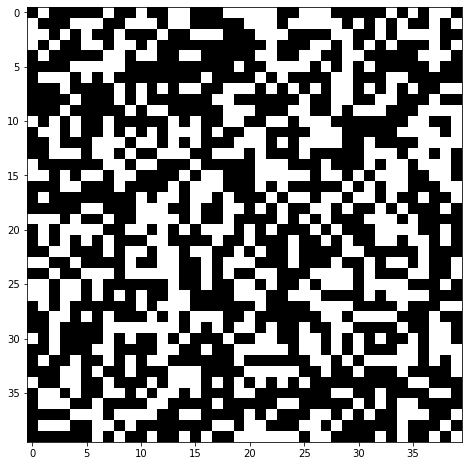

1485
209
1052
623
500
110
75
1284
201
210


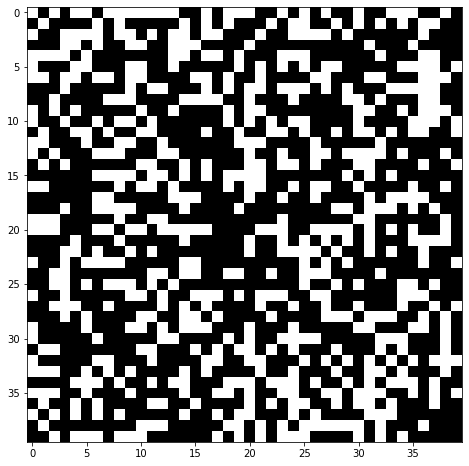

188
325
252
811
962
945
1034
963
203
502


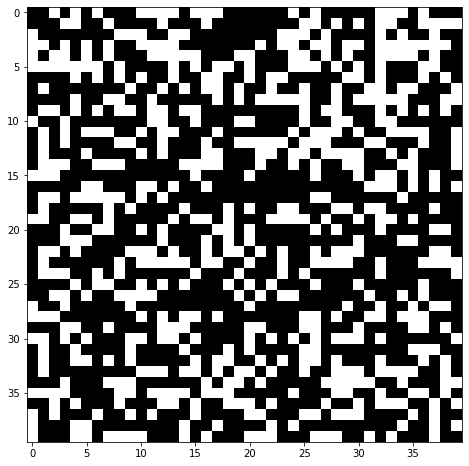

264
653
519
668
1233
967
318
553
337
752


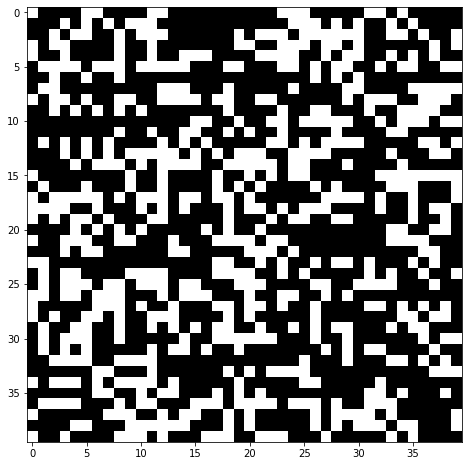

59
435
229
1458
217
981
856
712
396
1847


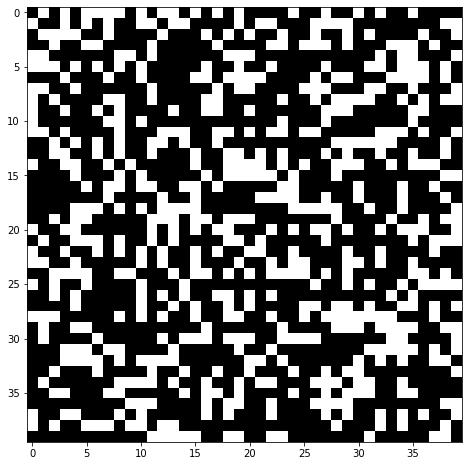

818
216
1560
784
146
488
228
308
112
180


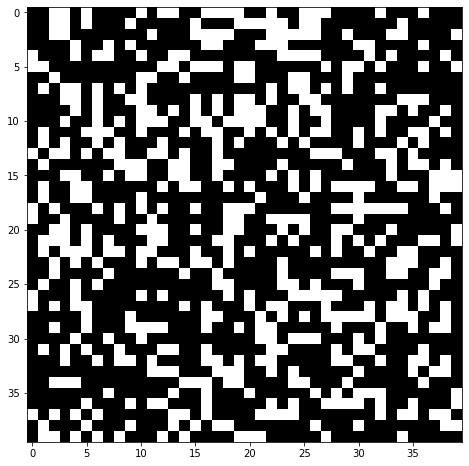

135
182
805
986
704
322
165
291
1110
281


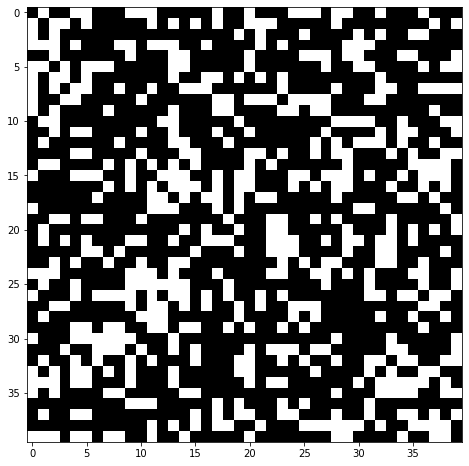

478
1017
429
356
378
653
172
399
694
420


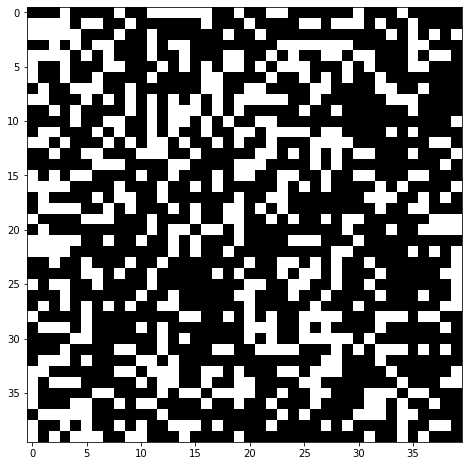

567
2367
462
103
983
383
153
83
187
483


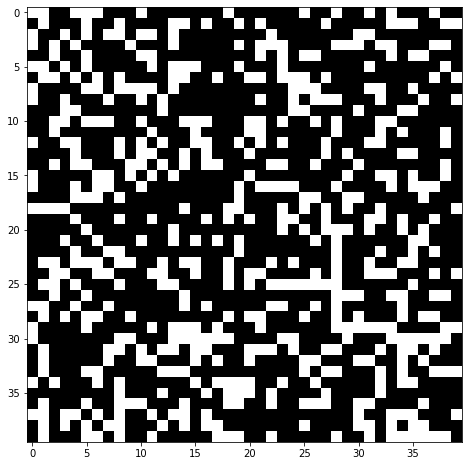

392
237
293
523
1672
913
787
290
149
235


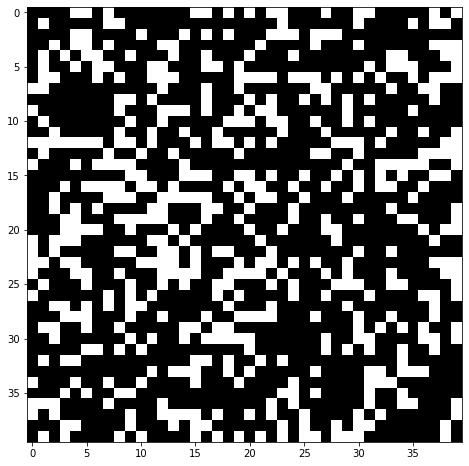

590
1148
1434
1413
467
432
120
1101
89
763


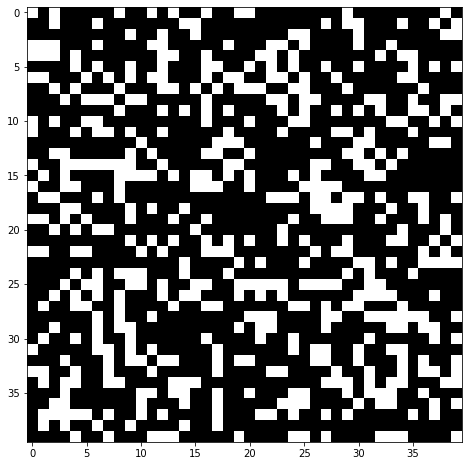

1715
288
620
455
1055
546
290
154
709
441


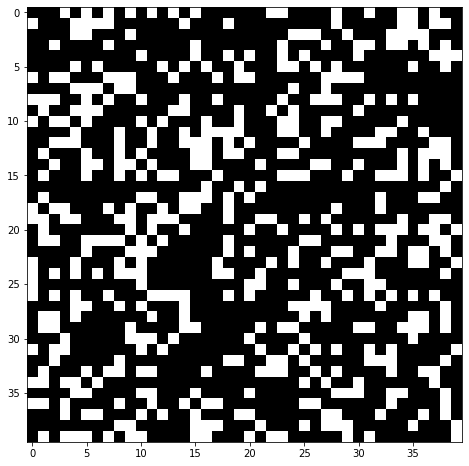

168
534
68
109
871
294
11
741
772
689


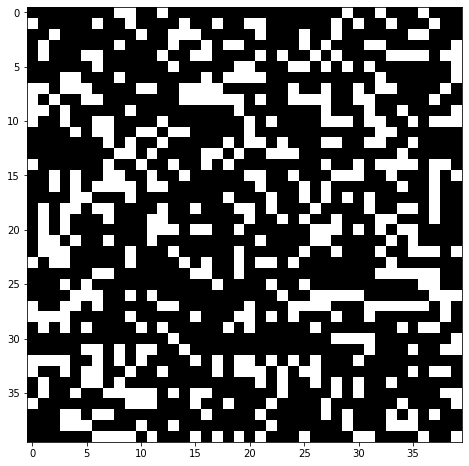

446
223
220
287
14
397
140
236
126
28


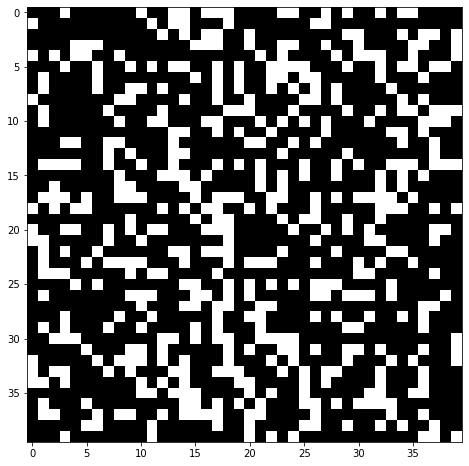

263
11
165
42
656
146
10
2211
19
120


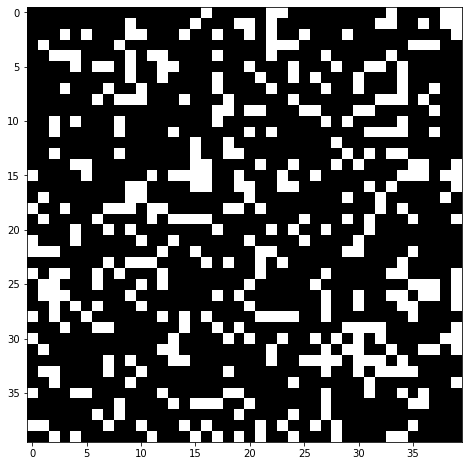

748
14
23
1319
15
17
39
21
5
27


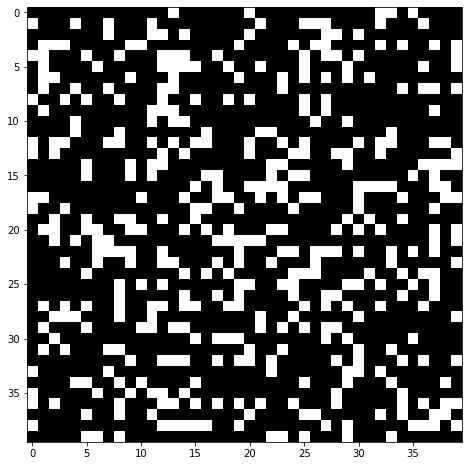

975
12
795
702
9
200
311
35
17
65


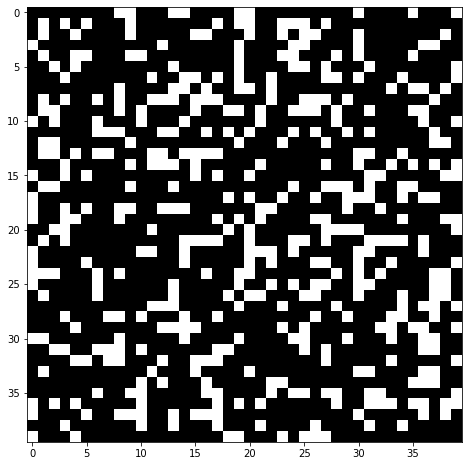

8
7
298
204
171
7
557
8
6
414


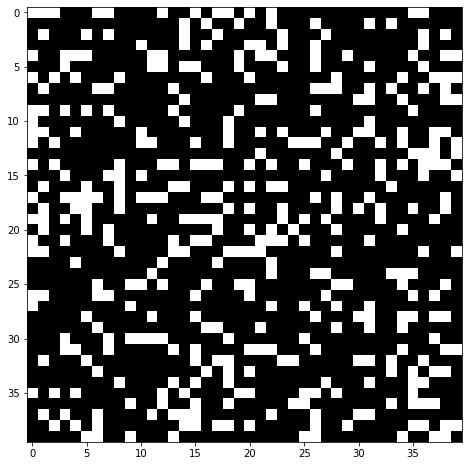

457
7
203
16
172
260
14
8
669
14


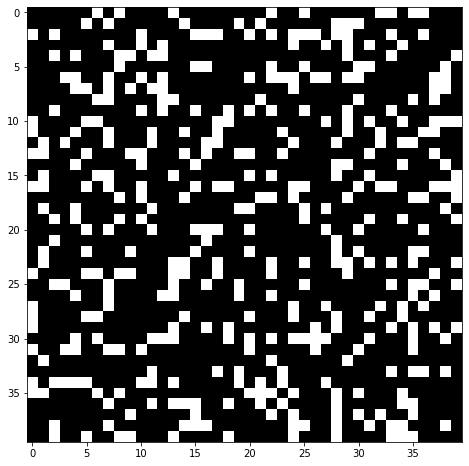

128
5
390
12
8
5
8
7
1993
4


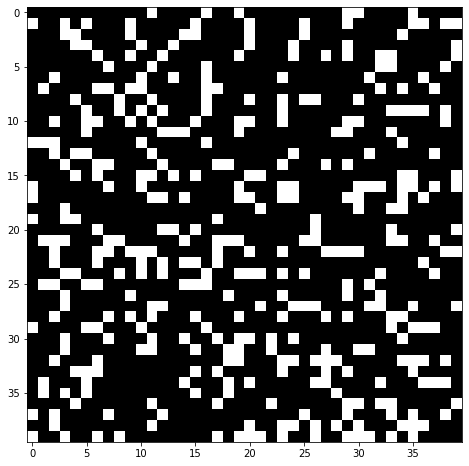

5
4
4
7
5
21
615
7
6
117


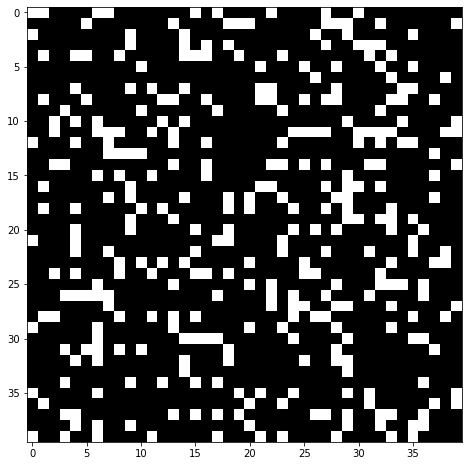

4
4
4
7
4
14
11
666
223
5


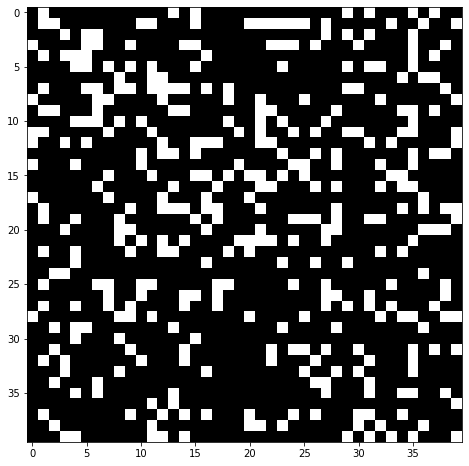

7
15
667
754
3
8
6
6
4
4


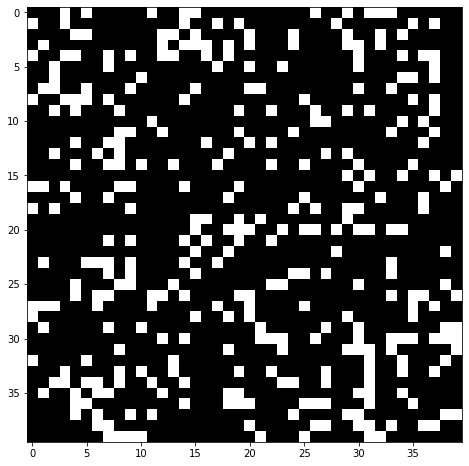

6
3
5
7
3
8
4
162
5
4


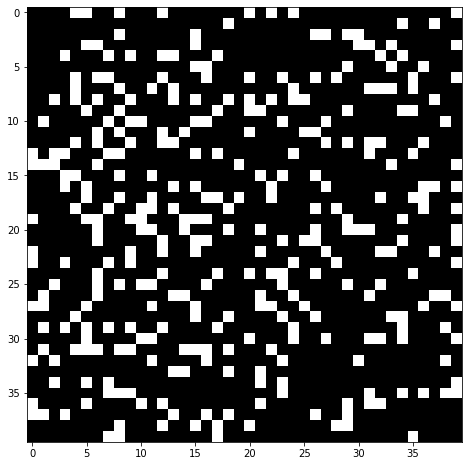

3
7
5
3
3
4
7
5
4
4


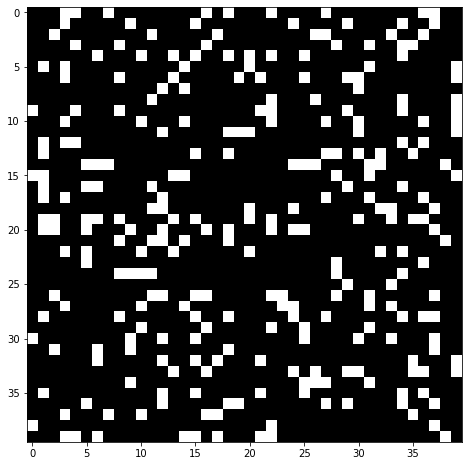

3
3
3
4
3
106
3
3
4
7


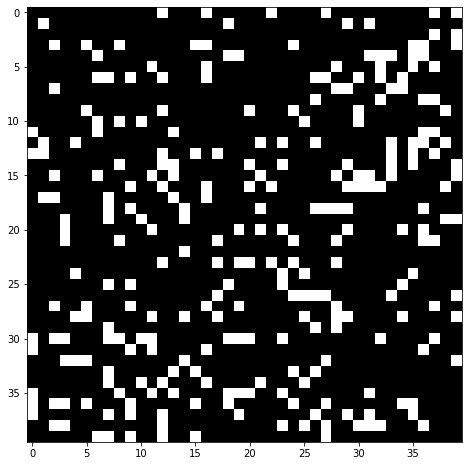

8
4
5
3
11
13
3
4
4
5


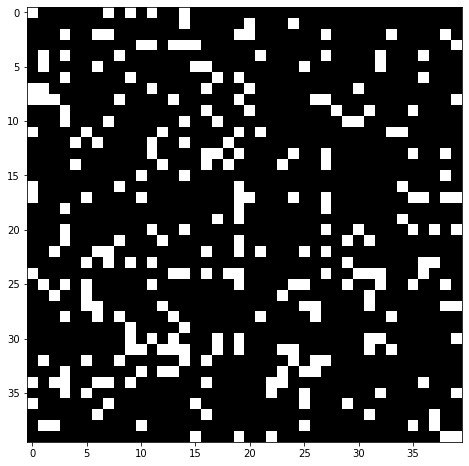

3
3
3
3
3
4
3
3
3
3


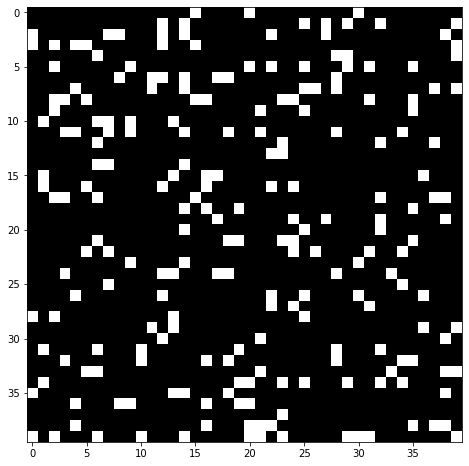

3
3
3
3
3
3
3
3
3
2


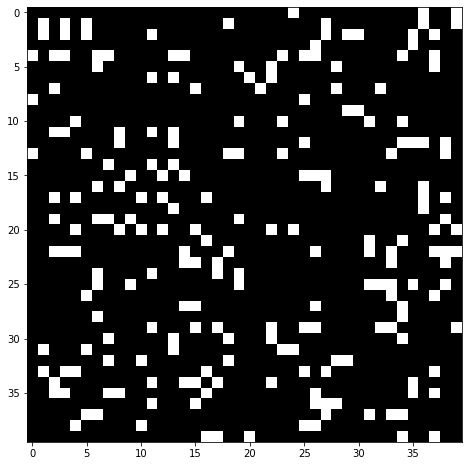

3
3
3
3
3
3
3
3
3
3


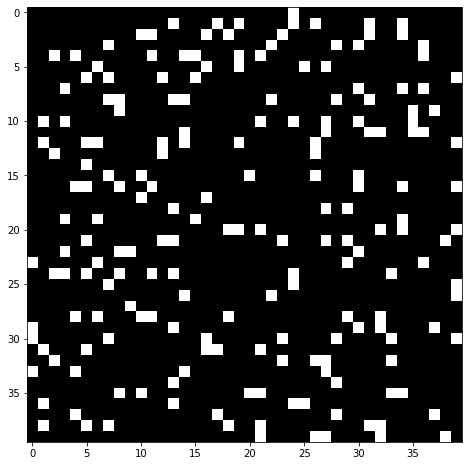

3
3
3
2
3
3
3
3
3
3


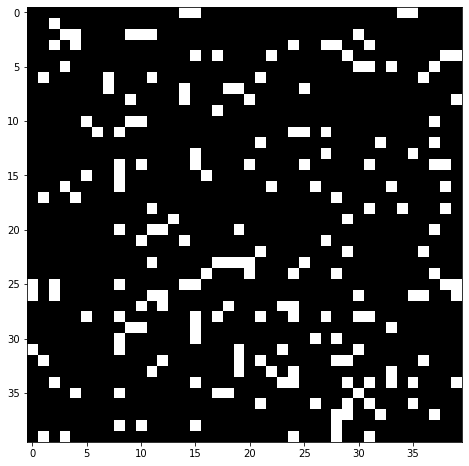

2
2
3
3
2
3
2
3
3
2


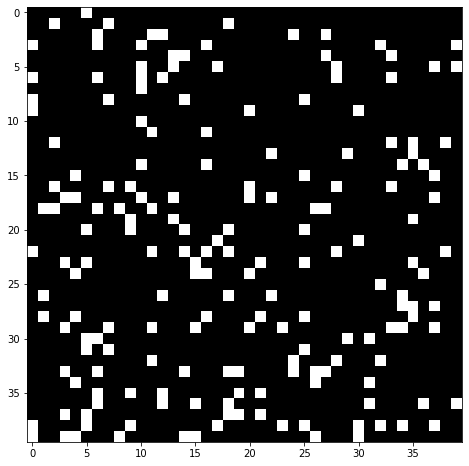

3
2
2
3
2
2
3
3
3
2


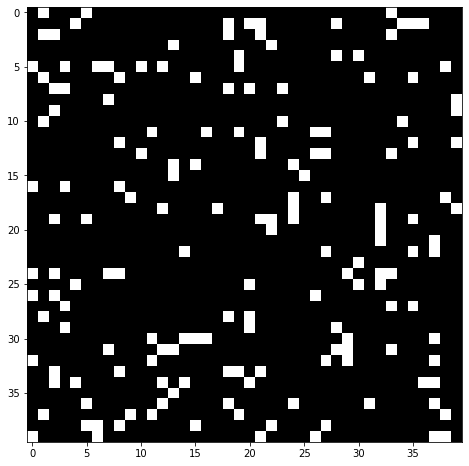

2
2
3
2
2
3
2
2
2
2


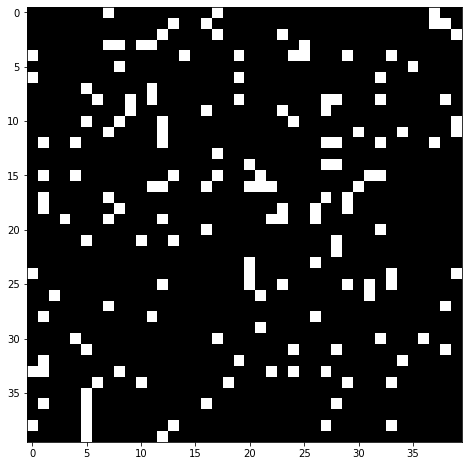

2
2
2
3
2
2
2
2
3
3


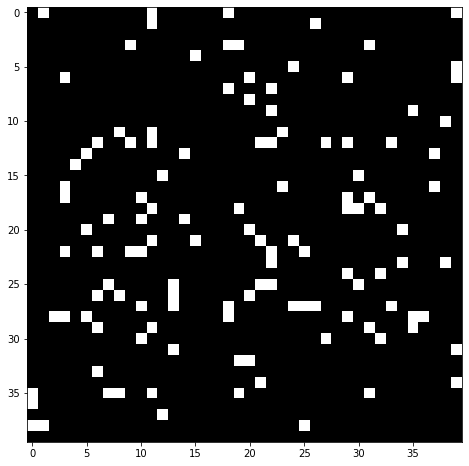

2
2
2
3
2
2
3
2
2
2


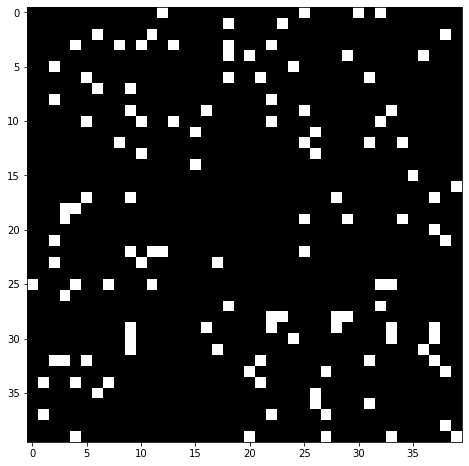

2
2
2
2
2
2
2
2
2
3


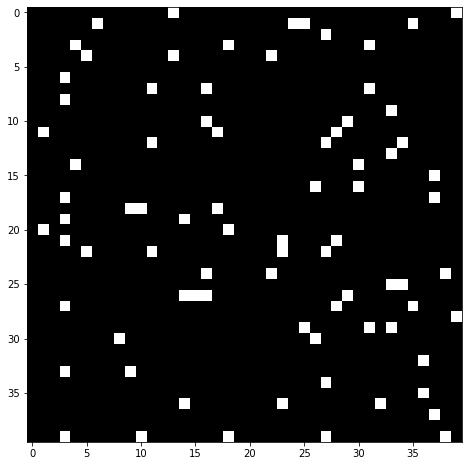

2
2
2
2
2
3
2
2
2
2


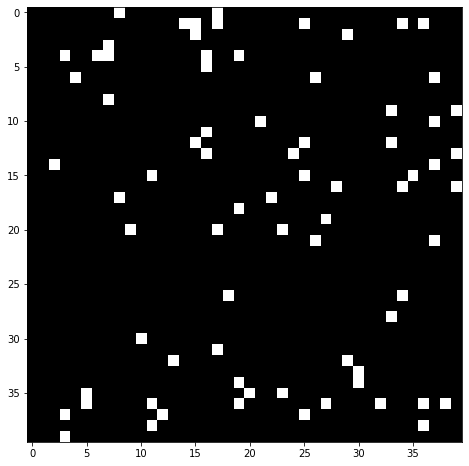

2
2
2
2
2
2
2
2
2
2


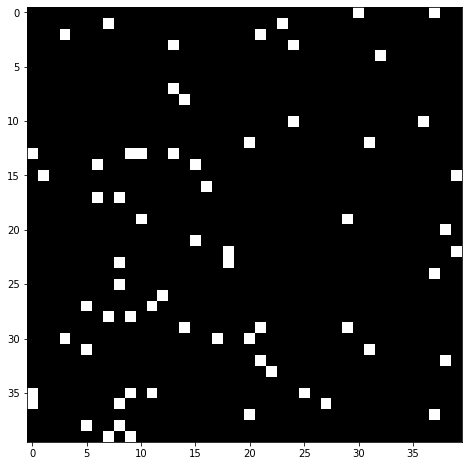

2
2
2
2
2
2
2
2
2
2


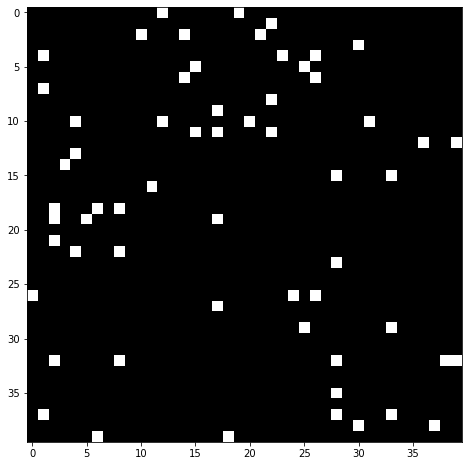

2
2
2
2
2
2
2
2
2
2


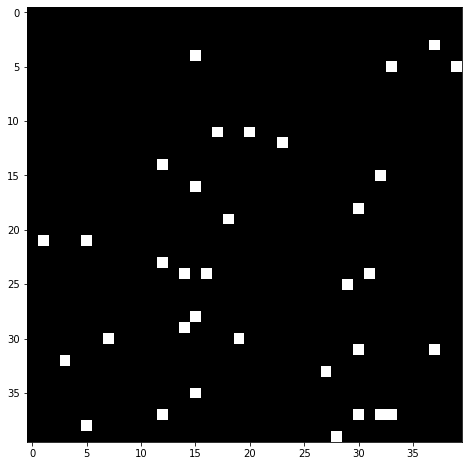

2
2
2
2
2
2
2
2
2
2


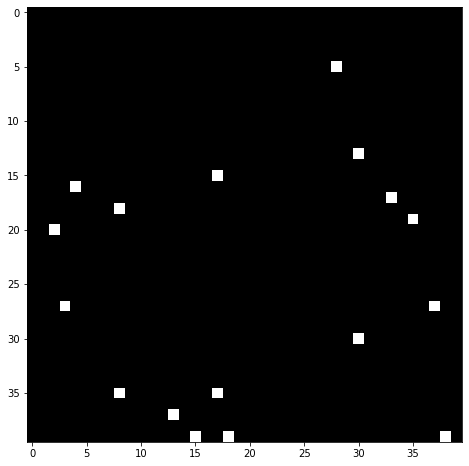

2
2
2
2
2
2
2
2
2
2


In [47]:
size = 40
num_filling = 99
num_average = 10
init_filling_factors = np.arange(1, num_filling+1) / (num_filling+1)
generations = np.zeros((num_filling, num_average))
max_generations = 4000

# Function to check stagnancy
def is_stagnant(grid, history):
    for prev_grid in history:
        if np.array_equal(grid, prev_grid):
            return True
    return False

# collect lots of data
for i in range(num_filling):
    init_filling_factor = init_filling_factors[i]
    for j in range(num_average):
        np.random.seed(1000+int(100*i)+j)
        grid = random_grid(size, init_filling_factor)
        if j == 0:
            fig, ax = plt.subplots(figsize=(8, 8))
            img = ax.imshow(grid, interpolation='none', cmap='binary')
            plt.show()
        
        histories = []
        for k in range(max_generations):
            next_grid = update_grid(grid)
            if is_stagnant(grid, histories):
                break
            histories.append(grid.copy())
            grid[:] = next_grid
        print(k)
        generations[i][j] = k

    

In [49]:
np.savetxt('generation.csv', generations, delimiter=",")

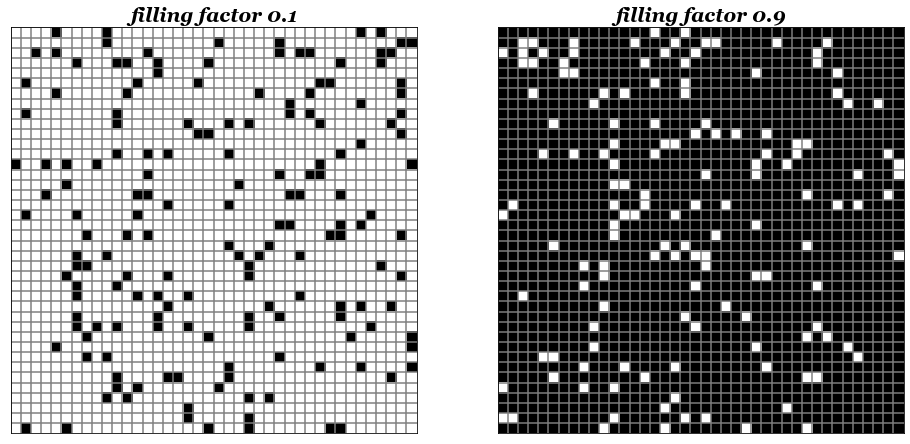

In [75]:
# plot displaying drastically different filling fractions 

# Set the grid size and create the initial grid
grid_lo = random_grid(size, filling_factor=0.1)
grid_hi = random_grid(size, filling_factor=0.9)

# Create the figure and axis for the animation
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(grid_lo, interpolation='none', cmap='binary')
ax[1].imshow(grid_hi, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('filling factor 0.1', fontdict=title_font)

ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('filling factor 0.9', fontdict=title_font)

for i in range(size):
    ax[0].axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax[1].axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax[0].axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')
    ax[1].axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')

plt.gcf().set_facecolor('white')

plt.savefig('./animations/filling_low_high.png')
plt.show()


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_21538/2043976692.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_21538/2043976692.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


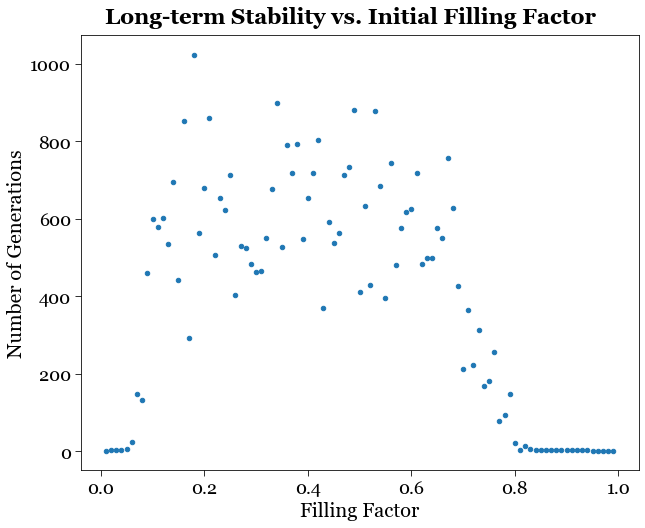

In [71]:
# plotting longevity against filling factors
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

# Create a side-by-side bar chart
ax.scatter(init_filling_factors, avg_generations, \
            marker='o', color=tableau_colors[0], s=20, \
            alpha=1)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_ylim(0, 750)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Filling Factor', fontdict=font)
plt.ylabel('Number of Generations', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Long-term Stability vs. Initial Filling Factor', fontproperties=suptitle_font, y=0.93)
# plt.xticks(x, categories)
# plt.legend(loc='upper right', prop=legend_font)

# Show the plot
plt.savefig('./plots/generation_vs_filling.png')
plt.show()

## Analysis - longevity vs. size of Petri dish

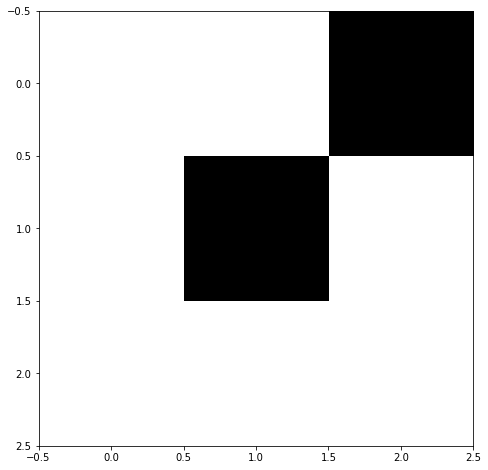

2
1
2
2
2
2
2
1
3
2


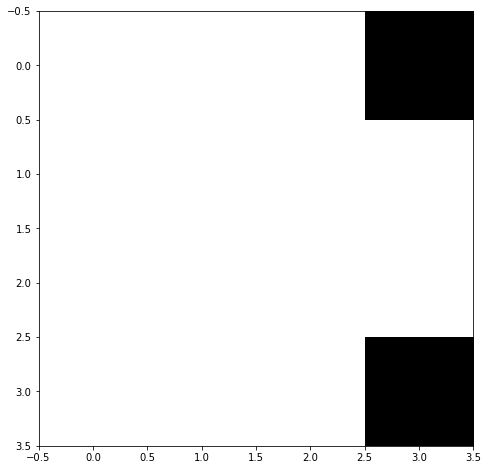

2
3
3
2
2
2
4
5
4
5


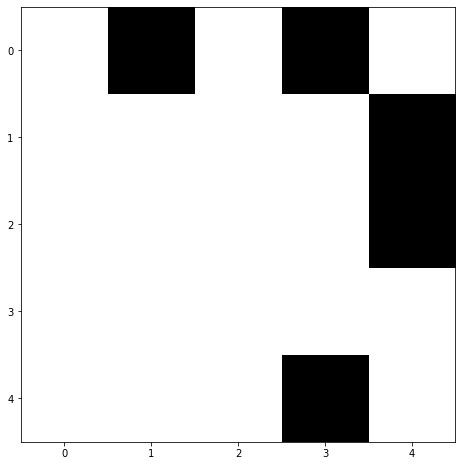

15
3
3
21
3
8
3
2
14
3


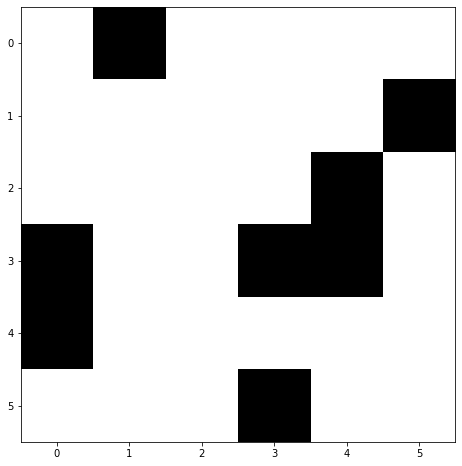

9
3
3
13
7
12
33
3
2
13


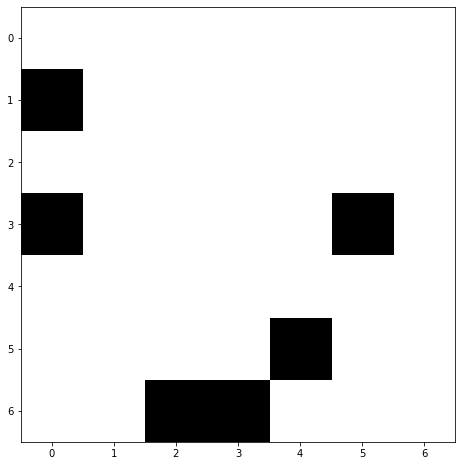

3
19
65
13
29
100
66
15
3
7


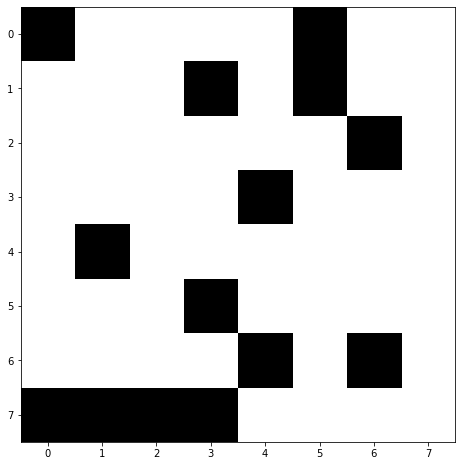

37
16
9
60
97
52
55
9
16
8


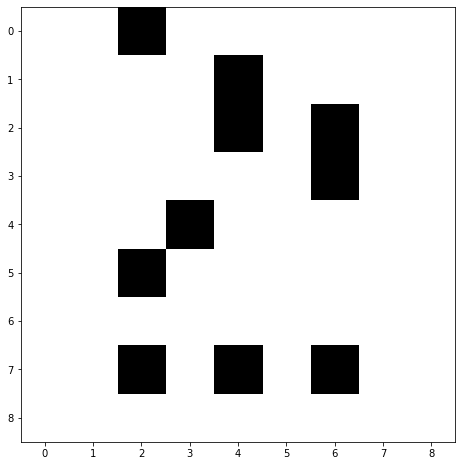

4
14
11
27
4
40
73
22
56
26


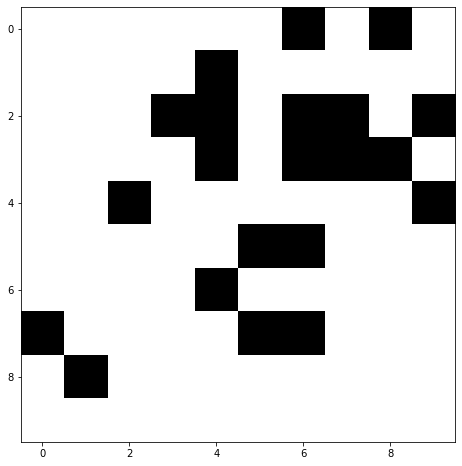

9
53
46
13
37
32
5
27
29
85


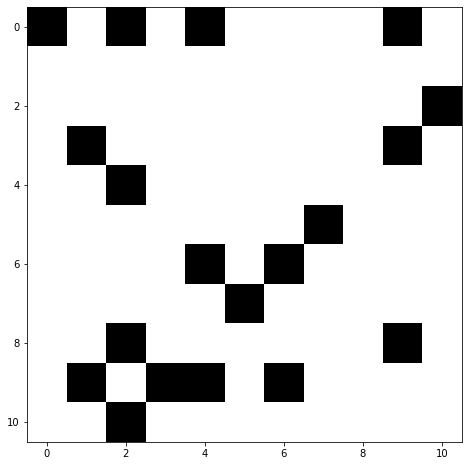

17
12
117
21
62
11
114
61
26
61


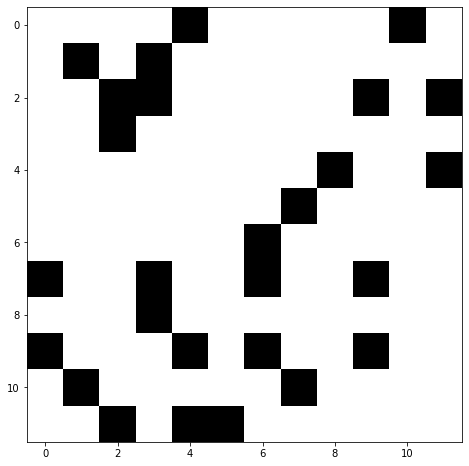

20
39
41
59
67
83
90
96
35
85


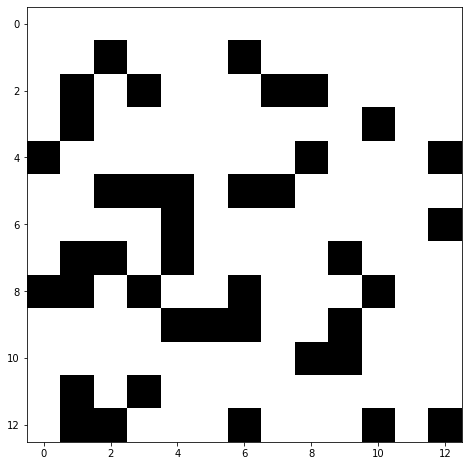

46
124
135
59
17
34
21
159
129
32


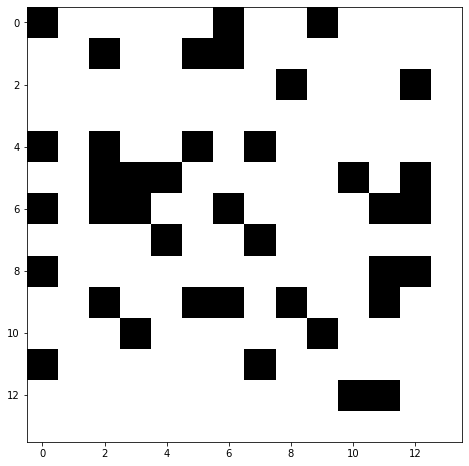

94
61
102
247
82
119
13
49
24
225


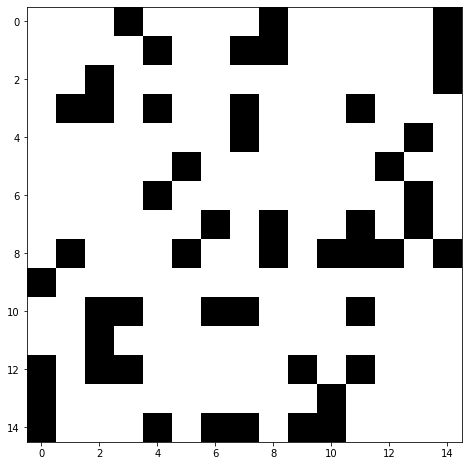

452
91
195
72
42
550
14
231
64
79


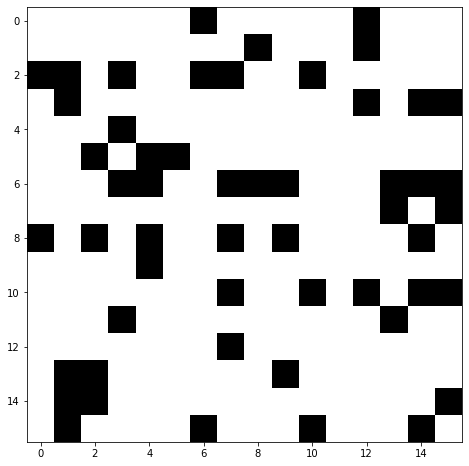

119
131
90
156
63
264
306
155
140
348


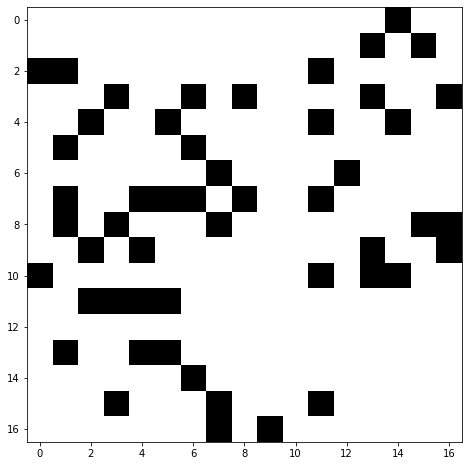

374
77
187
64
77
122
73
643
31
121


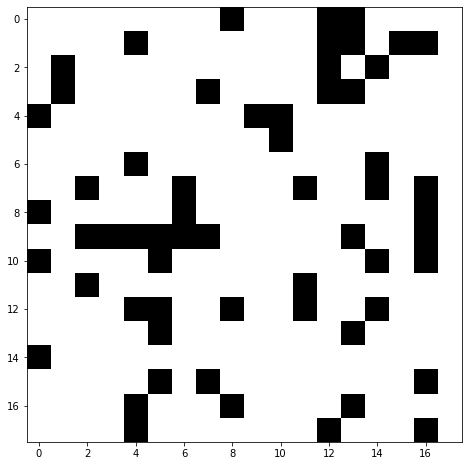

168
481
48
96
82
220
283
51
96
34


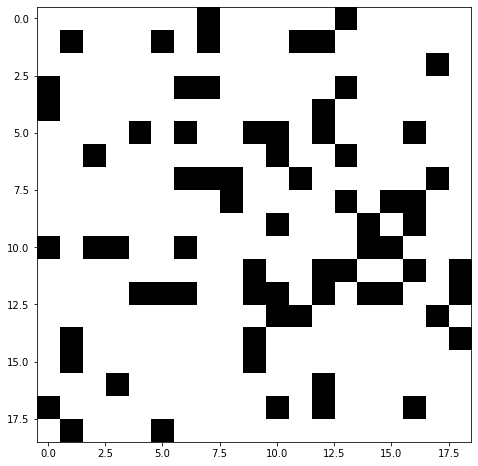

46
64
169
50
35
154
497
110
183
97


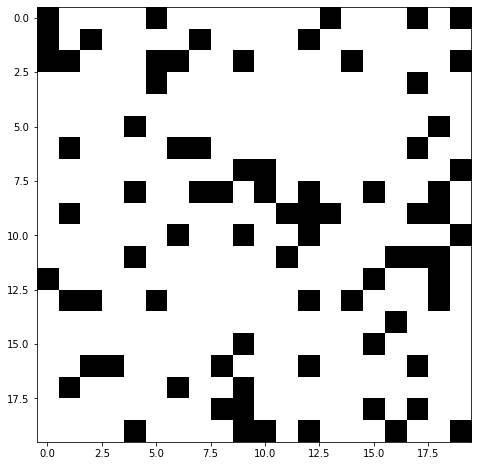

210
83
243
105
186
255
149
136
174
67


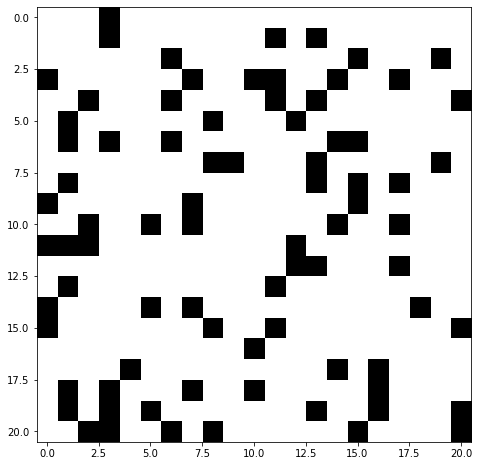

98
55
320
204
141
154
243
133
771
323


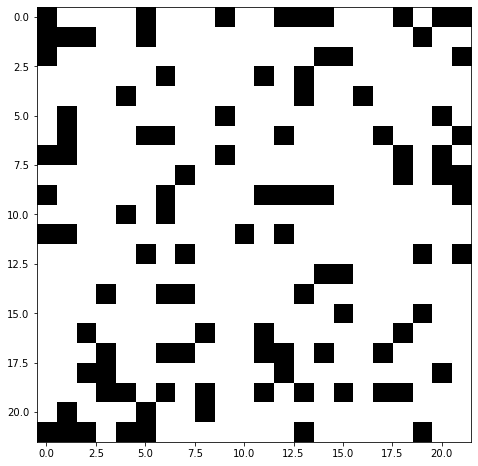

314
182
161
149
78
611
130
124
86
150


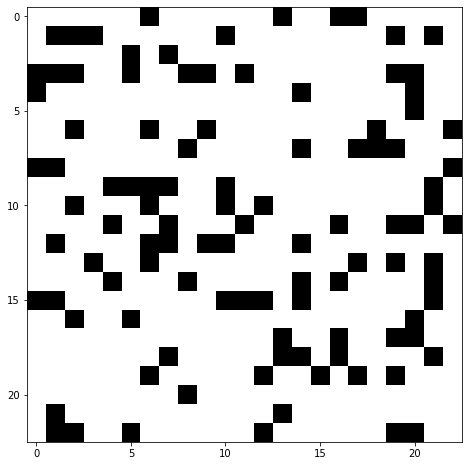

331
177
338
114
441
319
241
254
264
570


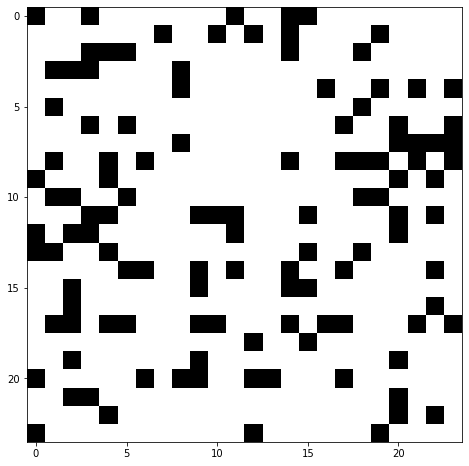

46
239
84
222
79
515
534
222
429
258


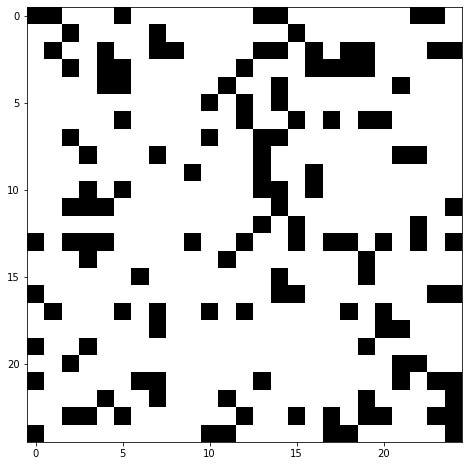

278
174
90
158
109
305
49
513
117
69


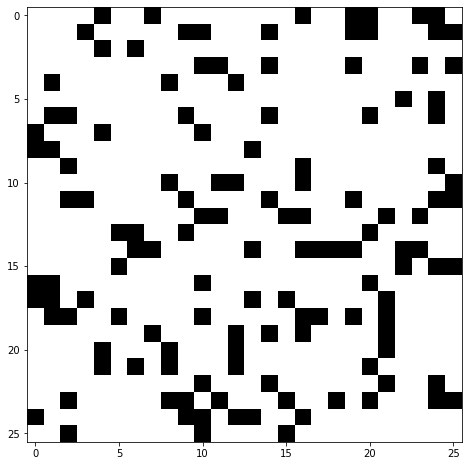

341
145
194
215
326
235
172
308
120
389


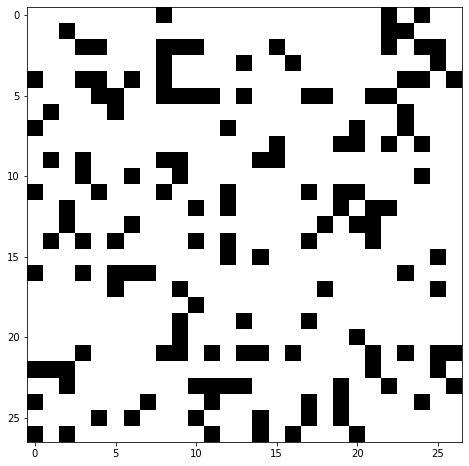

254
135
59
638
247
205
214
253
576
308


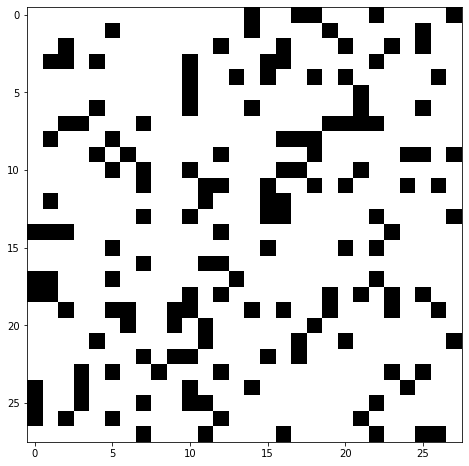

223
596
166
284
194
69
652
312
450
583


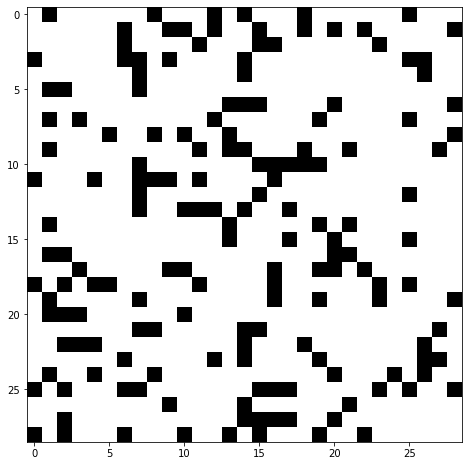

362
626
296
1787
561
103
179
670
94
69


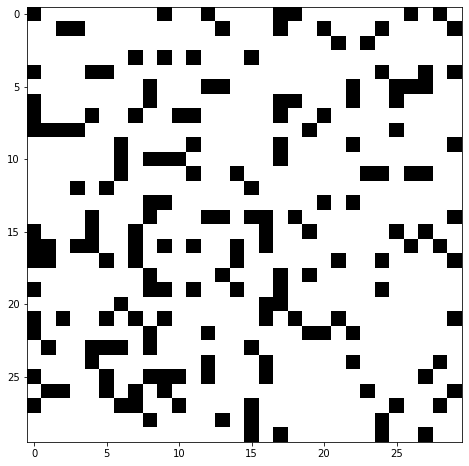

488
458
772
712
176
618
82
383
168
389


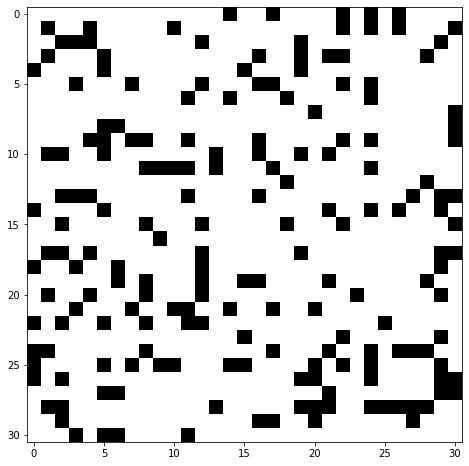

447
182
1073
55
381
409
308
354
534
107


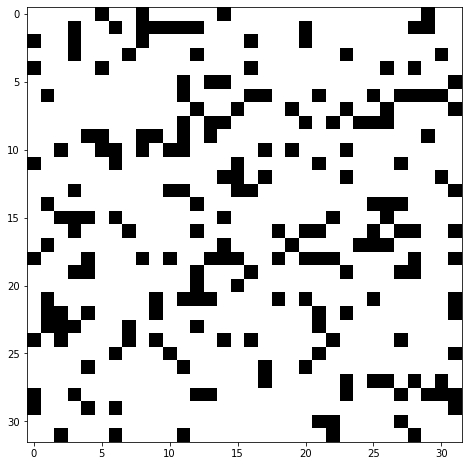

295
215
75
48
494
100
115
163
405
433


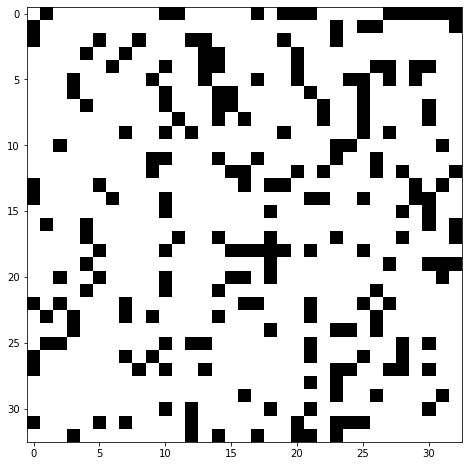

392
448
582
194
193
1387
663
196
230
195


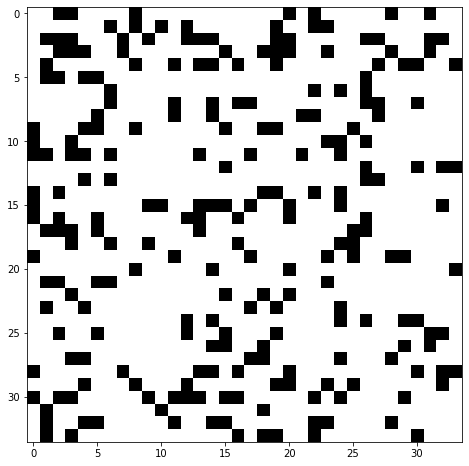

53
1375
476
334
564
558
98
124
1586
91


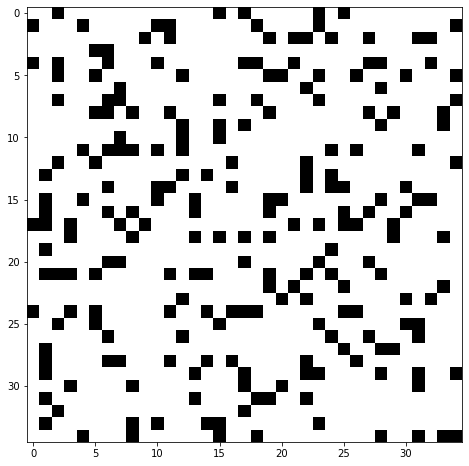

445
254
593
734
452
52
234
241
411
962


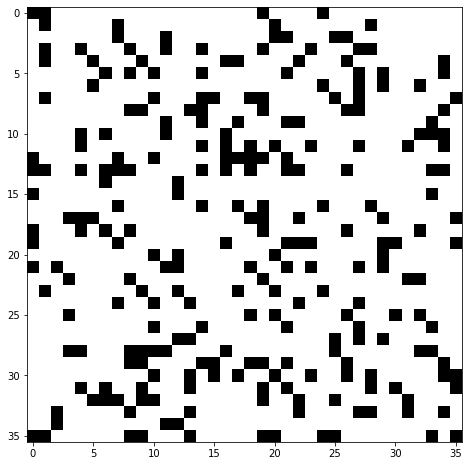

456
448
794
866
528
223
932
122
537
354


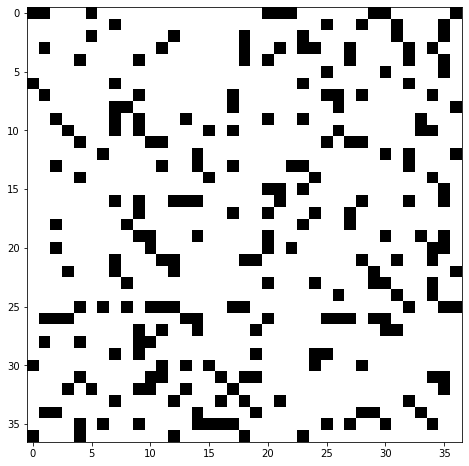

266
1031
163
274
507
608
683
763
862
367


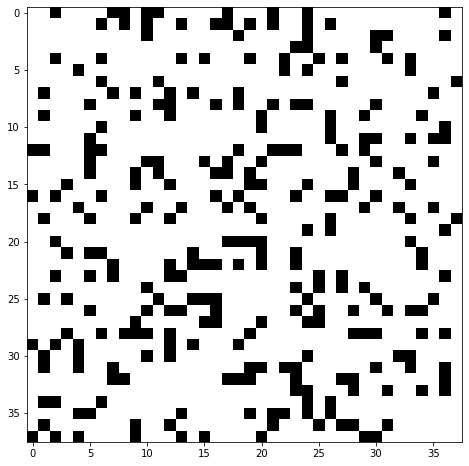

552
489
1115
466
885
253
349
456
225
466


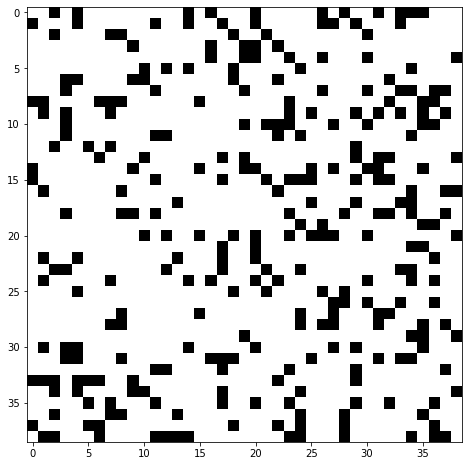

133
517
723
1108
179
162
457
1105
805
591


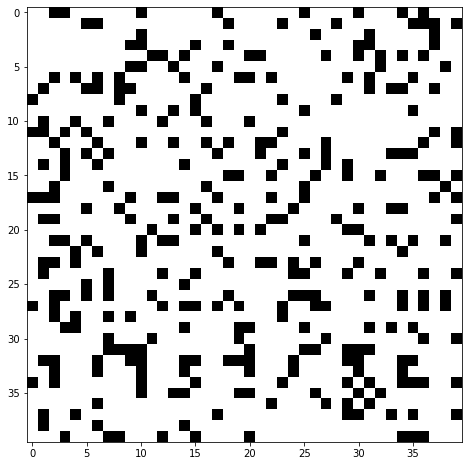

436
1305
1193
573
175
310
338
357
474
362


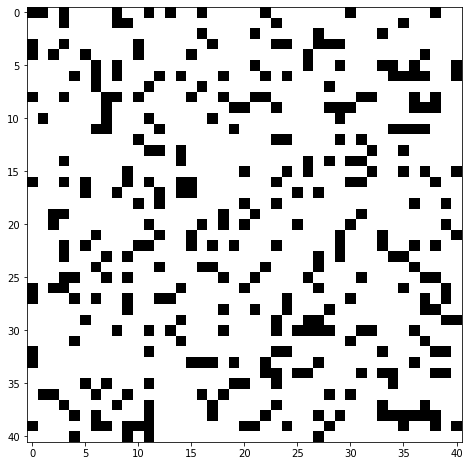

593
1045
379
1473
121
373
987
1403
454
983


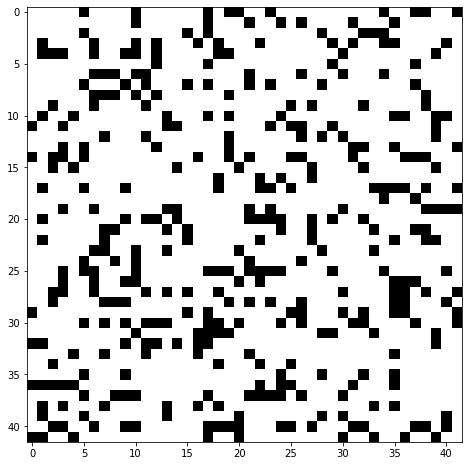

545
1045
1294
1261
277
321
287
725
437
268


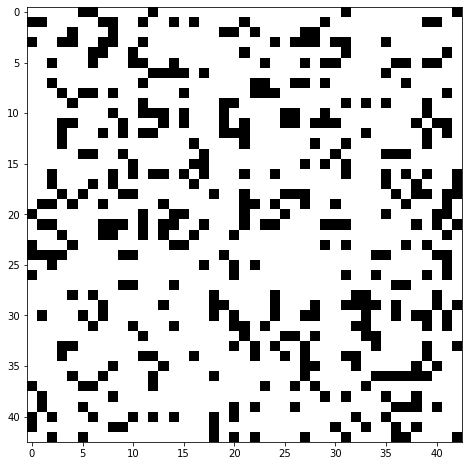

1949
1471
802
325
848
671
488
658
838
601


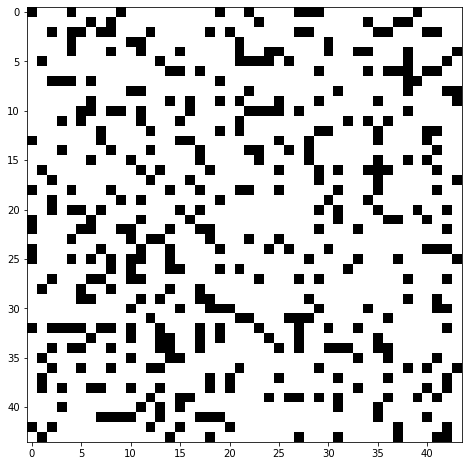

1371
168
1209
214
325
431
1046
686
2356
336


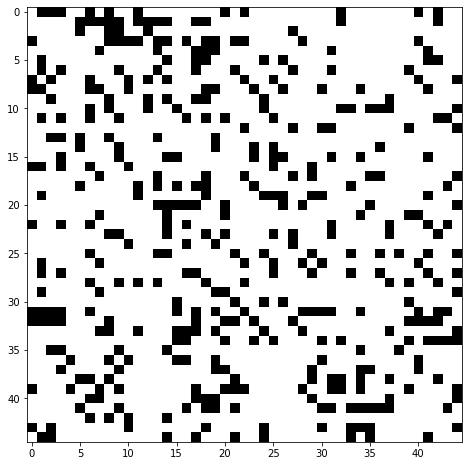

298
879
3013
477
1233
2027
1678
941
1189
873


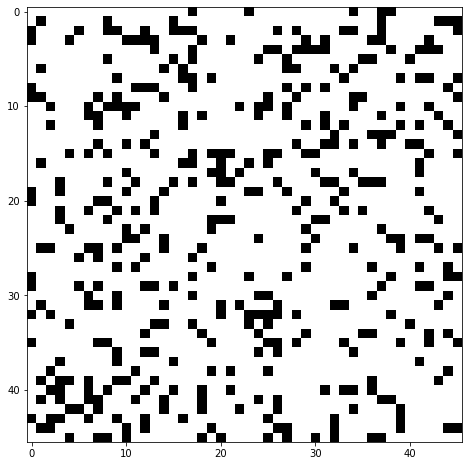

1637
1338
593
331
903
1316
526
993
173
1232


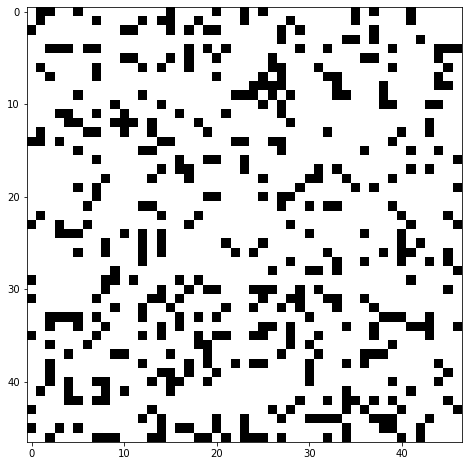

638
1332
444
313
253
458
1384
351
641
757


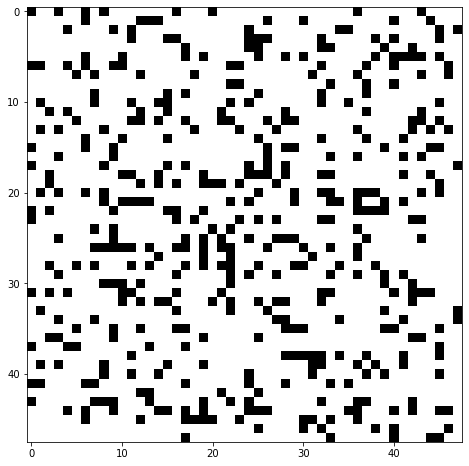

372
761
700
189
984
766
2099
977
640
676


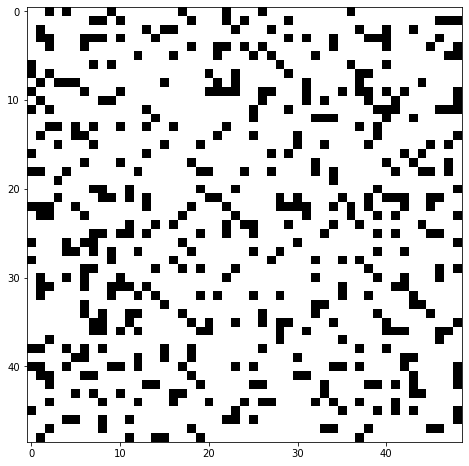

573
514
1030
685
1034
601
1908
507
701
862


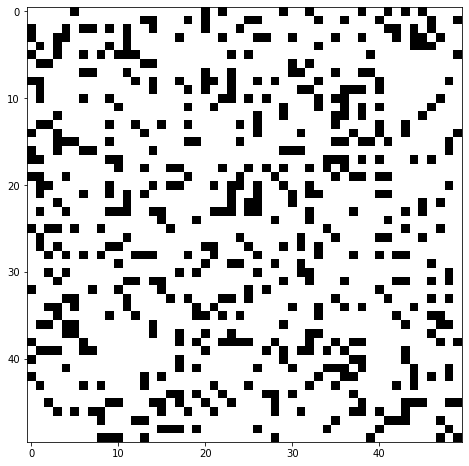

1045
434
149
298
358
915
1062
251
833
1248


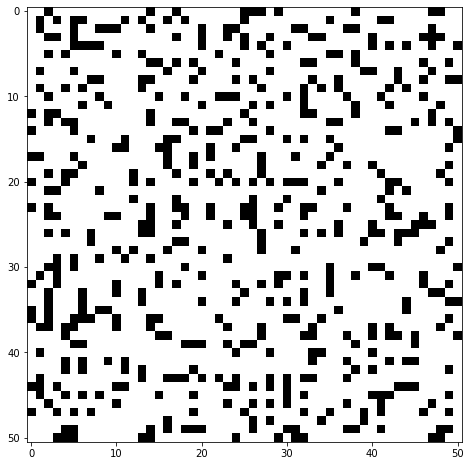

1220
1114
1075
127
270
1148
1446
1234
1157
1953


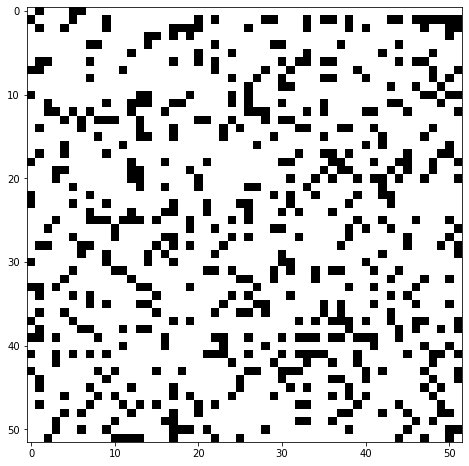

497
1244
514
396
281
1218
2724
547
764
428


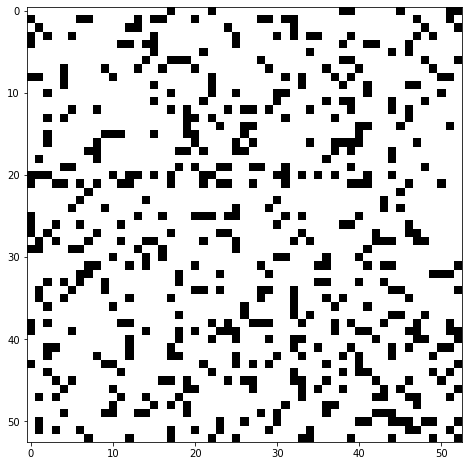

956
2175
1066
710
1810
569
2104
673
163
278


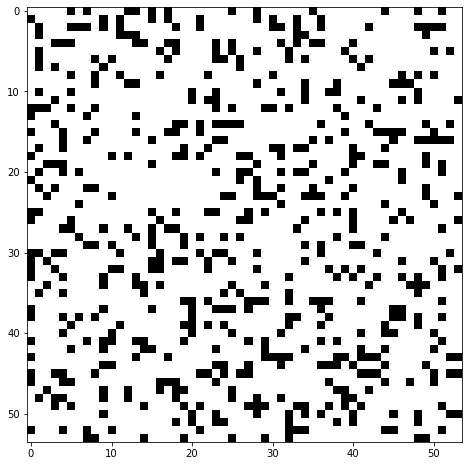

437
1882
544
297
1776
817
325
647
2696
1118


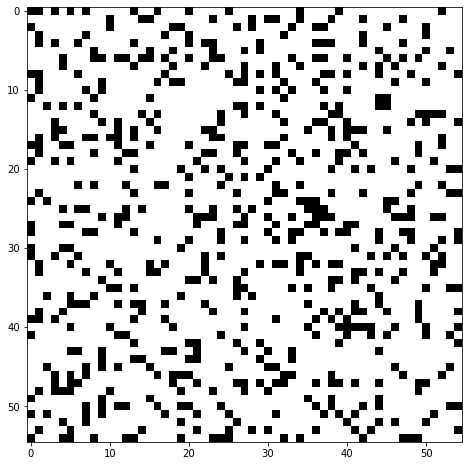

190
250
708
1239
303
1394
547
386
364
659


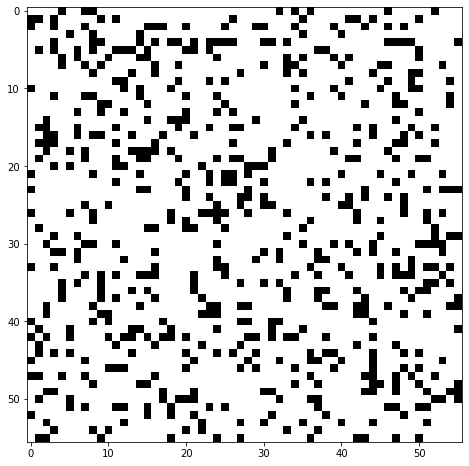

491
2347
1380
1289
392
1264
353
1509
509
608


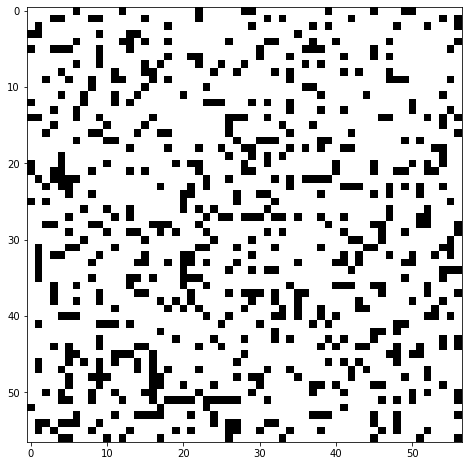

1634
1088
302
580
1467
1294
977
499
1678
1657


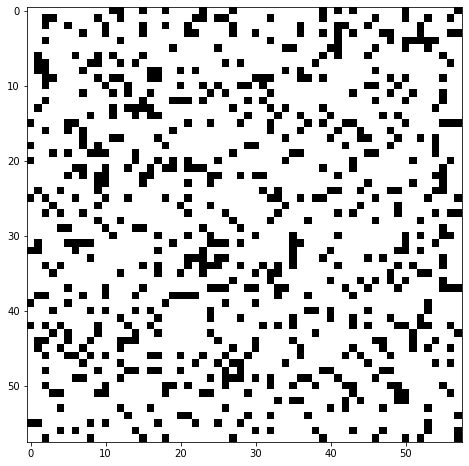

500
497
472
475
734
373
1370
1002
2220
836


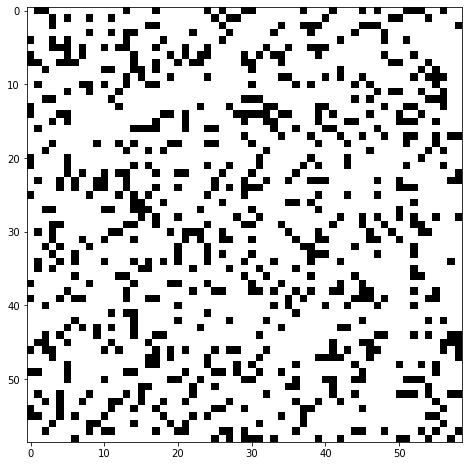

1103
1218
1217
646
432
1256
288
3694
751
424


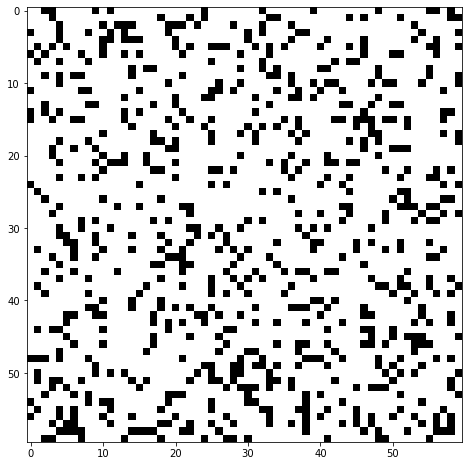

886
188
951
497
882
487
1242
3598
753
271


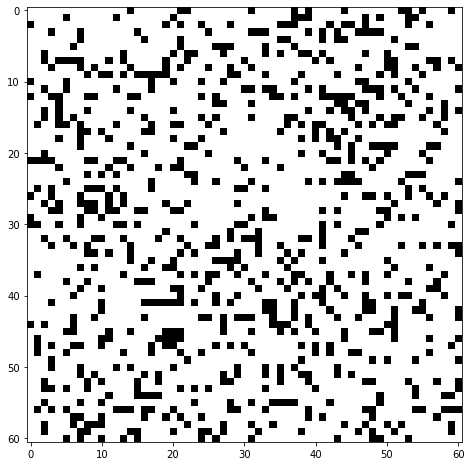

847
927
725
852
1256
1358
1985
491
476
805


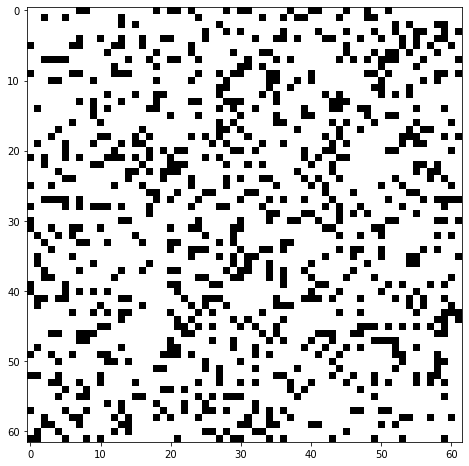

676
392
1751
562
444
669
1846
493
984
2445


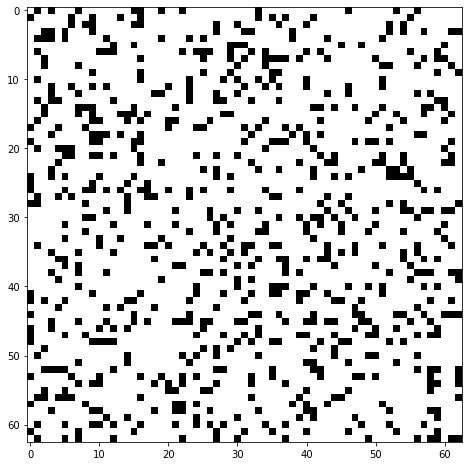

1002
758
837
519
1729
699
604
1123
1692
535


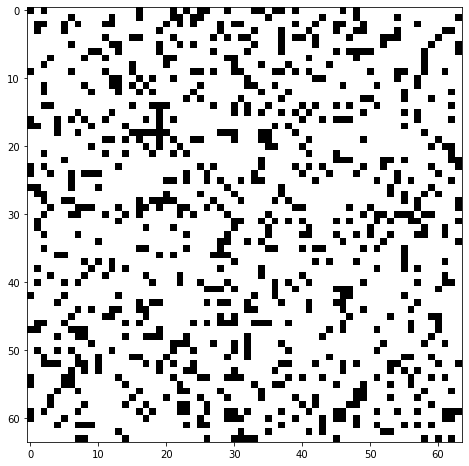

1556
1368
1021
2143
662
1130
823
480
775
2226


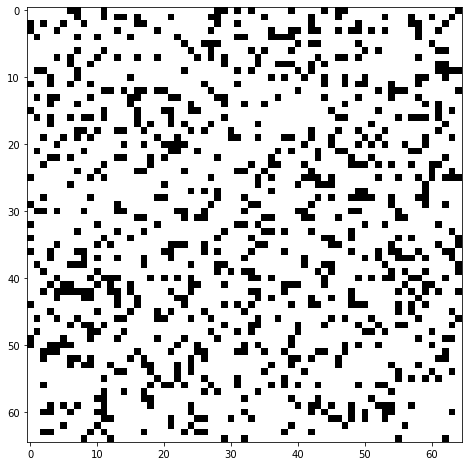

1773
1740
924
903
1111
1055
858
1997
1422
456


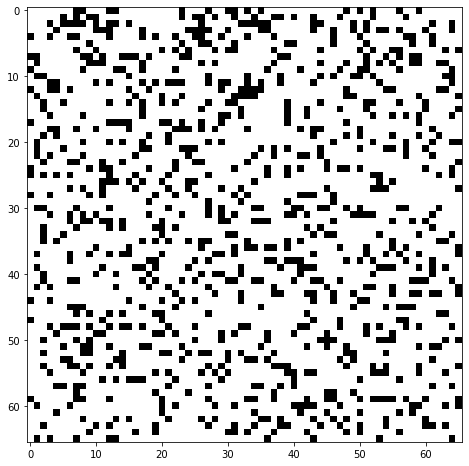

522
2576
681
278
550
824
823
1144
1698
963


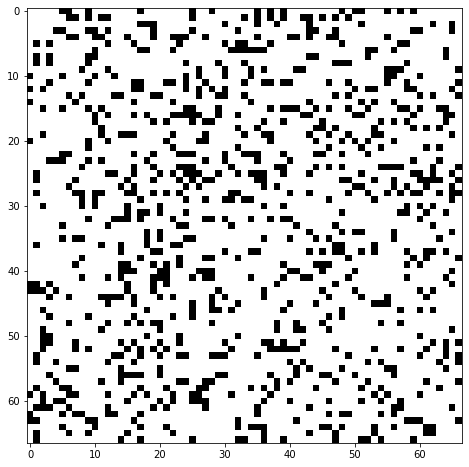

3999
848
1156
317
367
781
480
730
2331
667


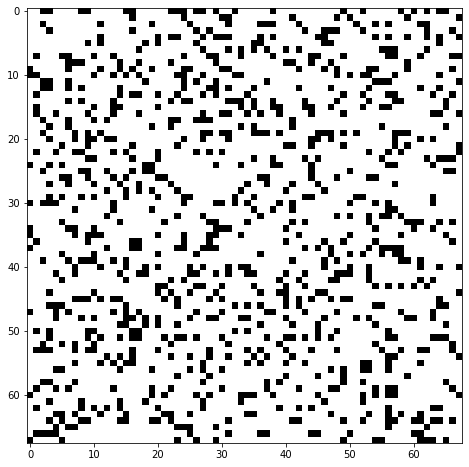

3224
1091
764
1799
552
860
1430
1138
2035
1034


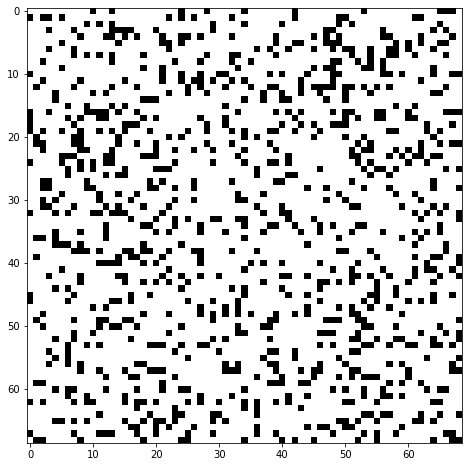

846
1381
1847
3517
754
1522
806
580
327
640


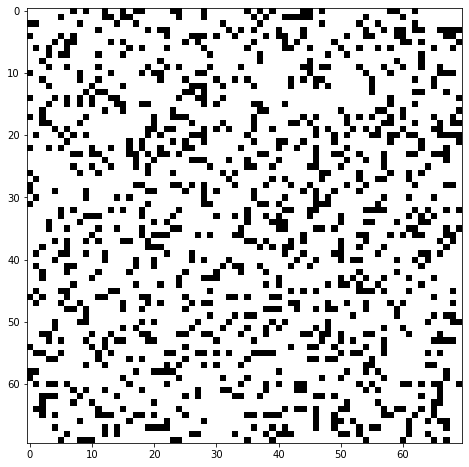

1199
1024
1811
2249
1192
2139
1349
505
296
2416


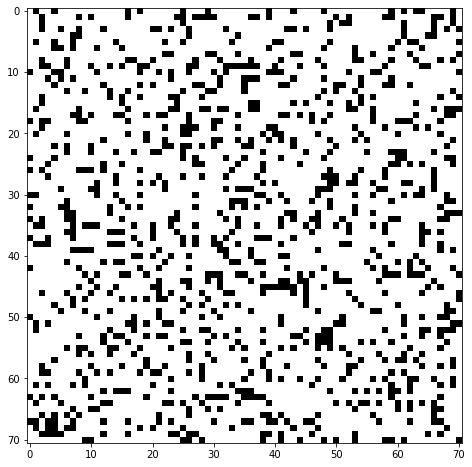

583
2187
625
2396
2483
1495
1865
2357
1498
1134


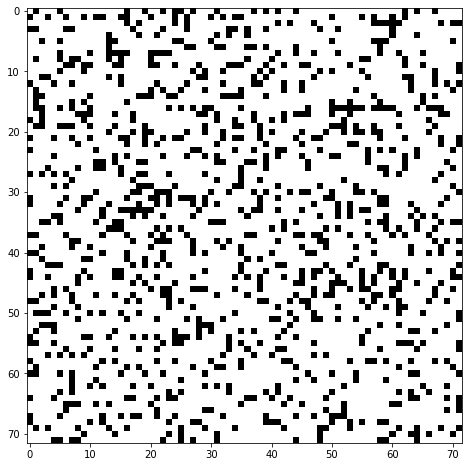

625
332
1731
1003
948
648
985
452
3999
2122


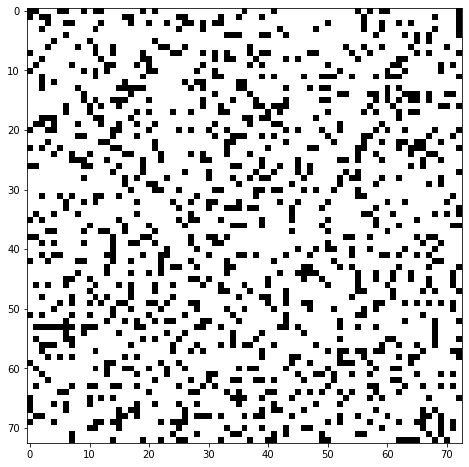

1417
859
847
1398
908
1333
1731
1851
1029
2552


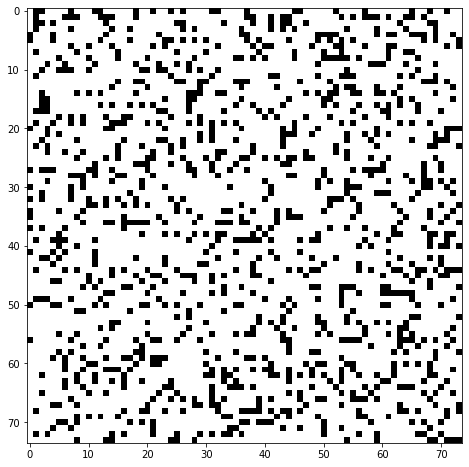

840
1003
576
1871
1248
584
1648
2979
1236
706


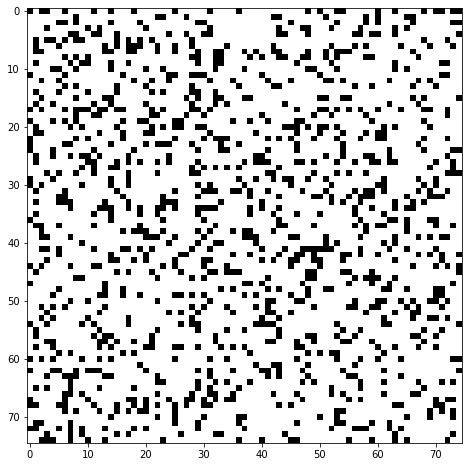

1828
2405
850
1109
1053
2406
891
2811
578
922


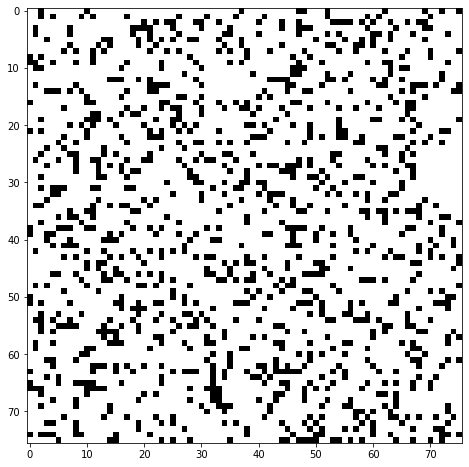

1409
1466
1150
2338
1516
3180
1060
568
3002
3140


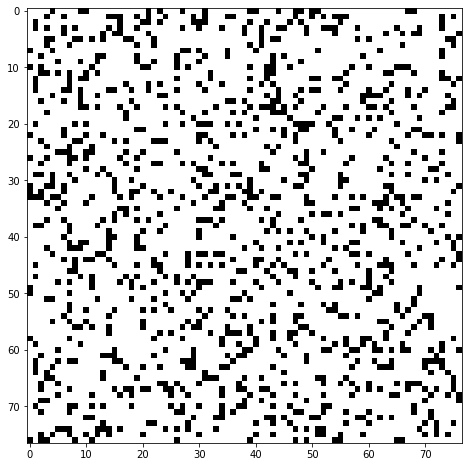

766
841
1985
1440
1966
574
302
1082
735
490


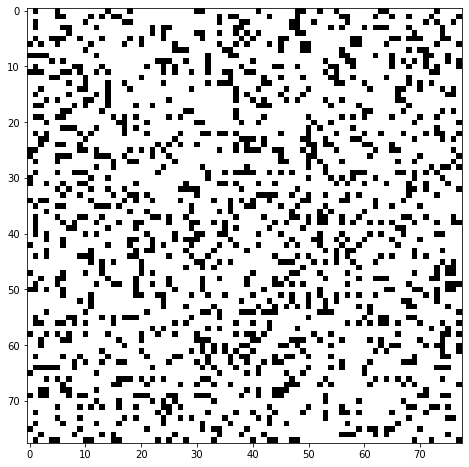

517
1814
704
1700
946
1545
662
1190
679
1901


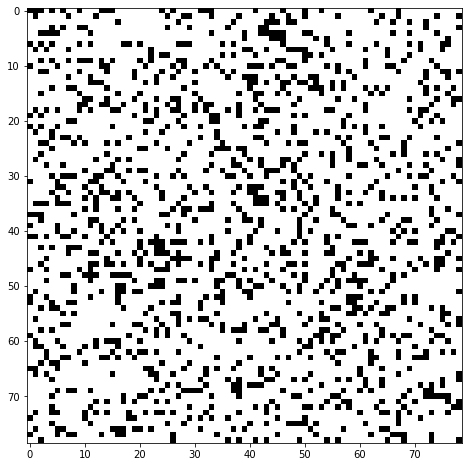

1581
1536
1567
864
3999
730
1437
1829
349
2078


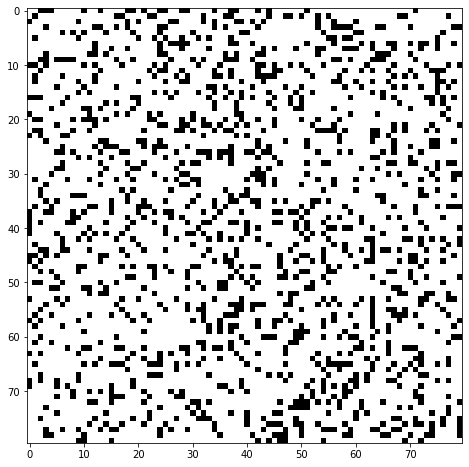

3685
3570
1117
1896
849
915
1415
2504
3285
1042


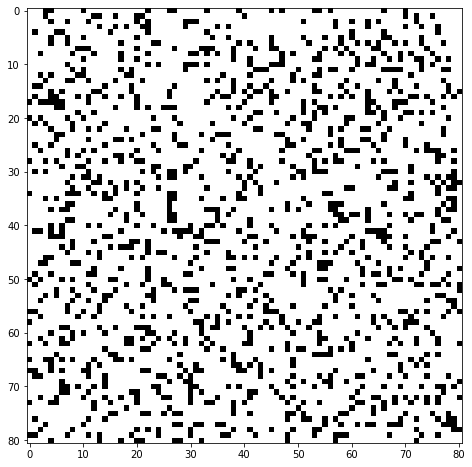

2964
2072
892
731
1591
1112
553
3999
792
2390


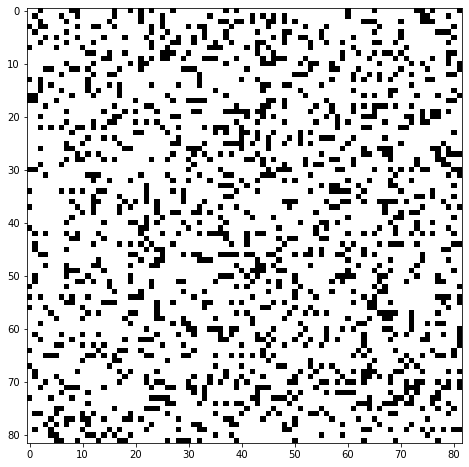

1256
1101
1090
1557
1710
1722
907
1155
1426
1408


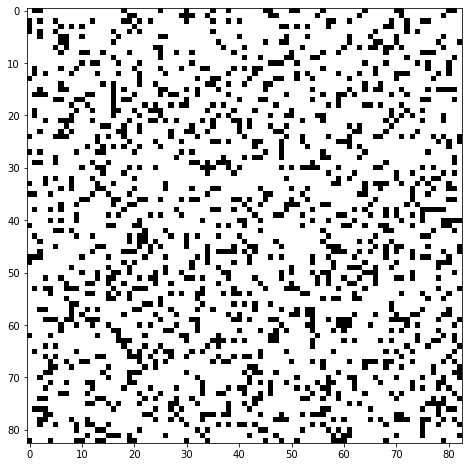

843
1875
3627
2561
1095
3999
3999
2275
739
858


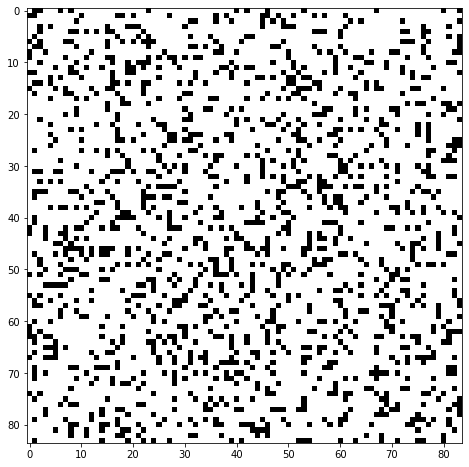

1312
3999
1877
1145
1536
630
1442
888
497
1948


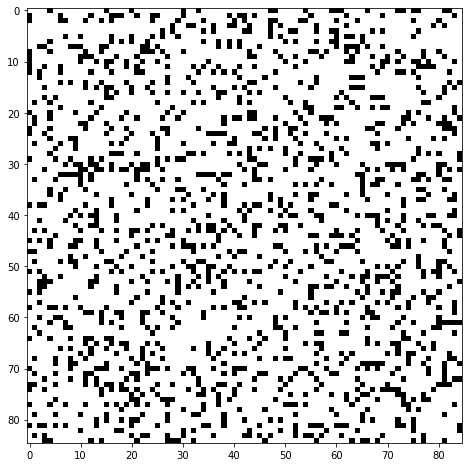

623
742
3024
558
3600
3999
1057
2166
960
3713


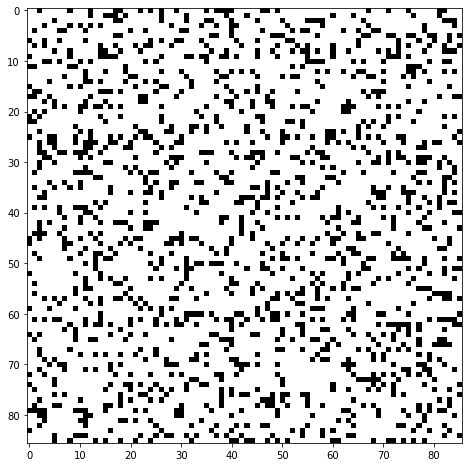

3999
988
664
1149
999
1270
1278
1443
695
2258


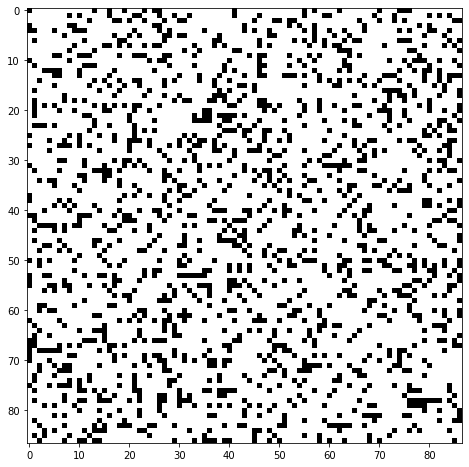

1008
920
2262
1751
556
2520
1749
3411
649
1376


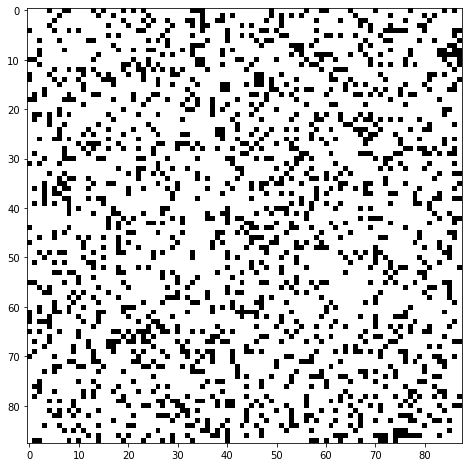

1216
2348
746
1309
1794
1271
977
1241
2243
2787


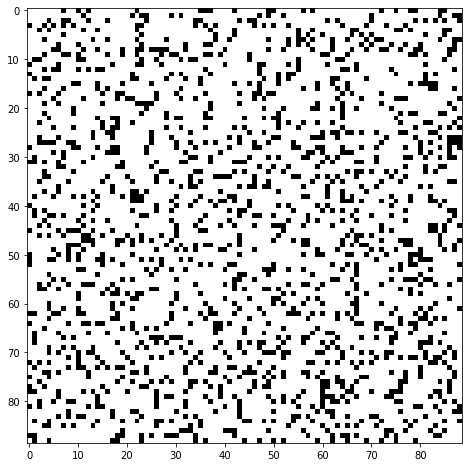

1254
2052
1839
2591
1131
717
698
1092
3999
1560


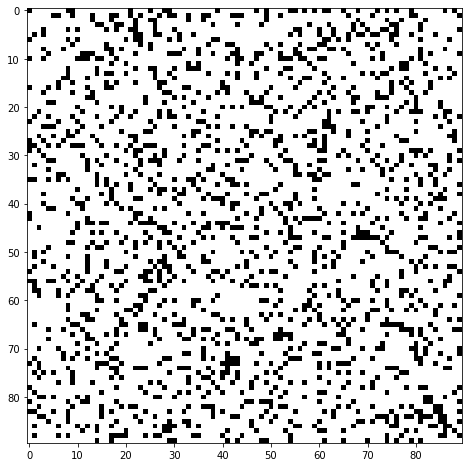

1006
1304
1579
943
2910
2452
591
1795
1535
2153


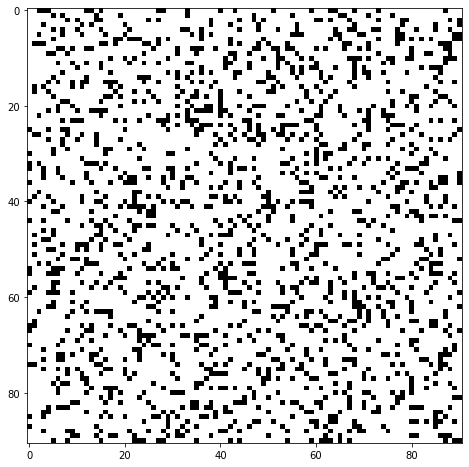

3419
1094
1313
1201
2065
308
3530
1426
1065
776


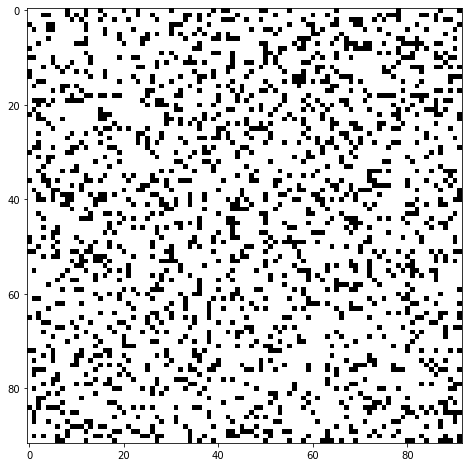

3584
1165
3265
3999
2055
3999
1620
3999
1042
1021


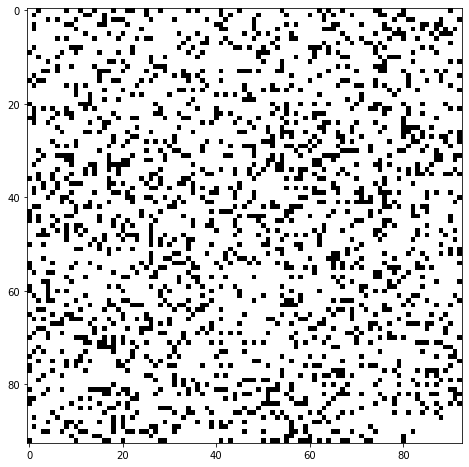

855
2298
1478
3999
3999
3283
732
1729
2885
1592


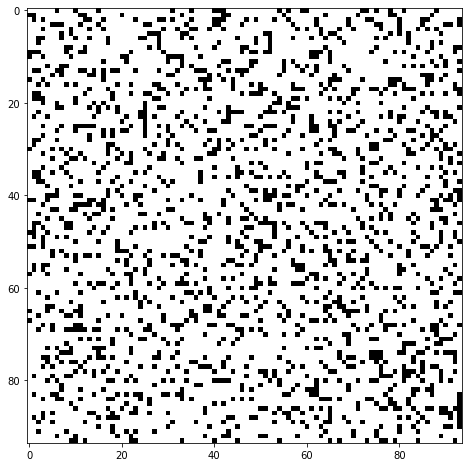

3999
1505
1593
796
1244
2665
519
820
986
3352


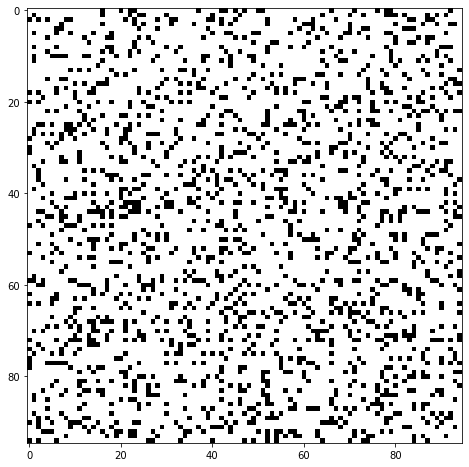

1559
1227
2261
820
1230
1899
1583
1322
3999
2412


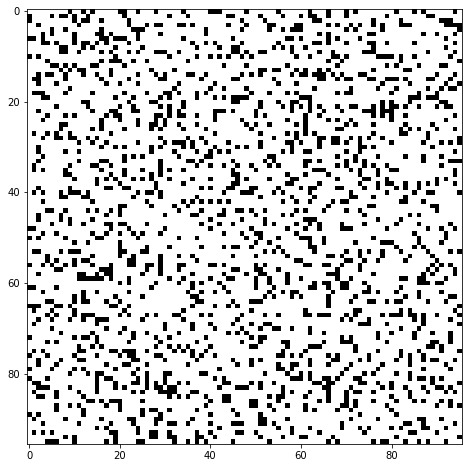

2142
950
1400
1556
2533
998
1770
1012
3196
1618


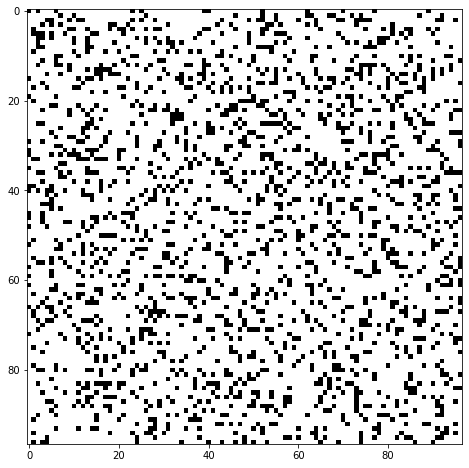

2432
3686
3147
1050
1247
1676
1416
1084
1178
2237


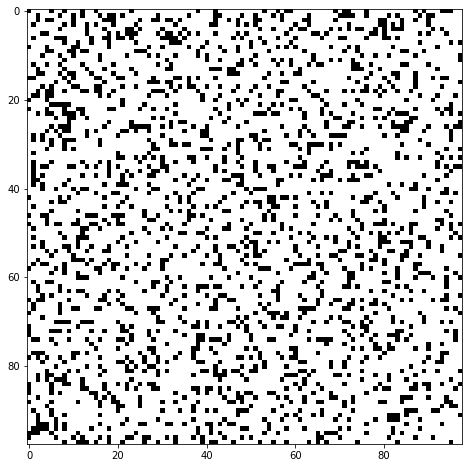

1313
1649
3211
2213
647
985
1196
1571
2671
894


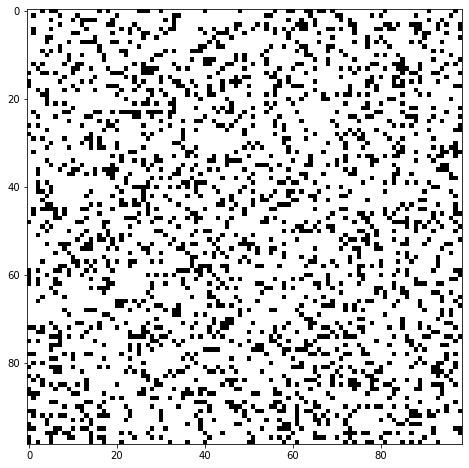

1590
1062
997
1806
1824
1231
2240
691
2734
1105


In [76]:
petri_sizes = np.arange(3, 100)
num_sizes = len(petri_sizes)
num_average = 10
initial_filling = 0.2
petri_generations = np.zeros((num_sizes, num_average))
max_generations = 4000

# Function to check stagnancy
def is_stagnant(grid, history):
    for prev_grid in history:
        if np.array_equal(grid, prev_grid):
            return True
    return False

# collect lots of data
for i in range(num_sizes):
    for j in range(num_average):
        np.random.seed(1000+int(100*i)+j)
        grid = random_grid(petri_sizes[i], initial_filling)
        if j == 0:
            fig, ax = plt.subplots(figsize=(8, 8))
            img = ax.imshow(grid, interpolation='none', cmap='binary')
            plt.show()
        
        histories = []
        for k in range(max_generations):
            next_grid = update_grid(grid)
            if is_stagnant(grid, histories):
                break
            histories.append(grid.copy())
            grid[:] = next_grid
        print(k)
        petri_generations[i][j] = k

    

In [77]:
np.savetxt('petri_generation.csv', petri_generations, delimiter=",")

In [83]:
avg_petri_generation = np.mean(petri_generations, axis=1)
std_petri_generation = np.std(petri_generations, axis=1)
len(petri_sizes) == len(avg_petri_generation)
len(petri_sizes) == len(std_petri_generation)

True

In [109]:
all_petri_sizes = (np.array([[petri_size] * 10 for petri_size in petri_sizes])).flatten()
all_petri_generations = petri_generations.ravel()
len(all_petri_sizes) == len(all_petri_generations)

True

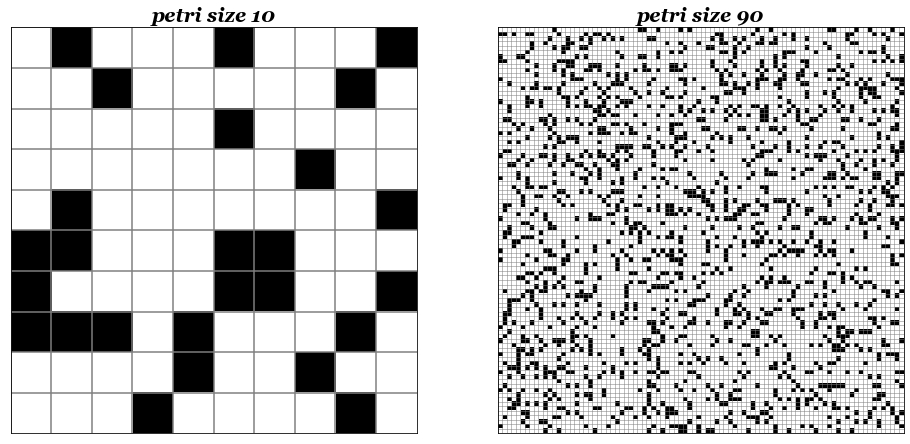

In [125]:
# big dish small dish
np.random.seed(46371)
small_size = 10
large_size = 90

# Set the grid size and create the initial grid
grid_lo = random_grid(small_size, filling_factor=0.2)
grid_hi = random_grid(large_size, filling_factor=0.2)

# Create the figure and axis for the animation
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(grid_lo, interpolation='none', cmap='binary')
ax[1].imshow(grid_hi, interpolation='none', cmap='binary')

# Hide tick labels and tick marks on the X-axis
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('petri size 10', fontdict=title_font)

ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('petri size 90', fontdict=title_font)

for i in range(small_size):
    ax[0].axvline(x=i-0.5, color=tableau_colors[7], linestyle='-')
    ax[0].axhline(y=i-0.5, color=tableau_colors[7], linestyle='-')

for i in range(large_size):
    ax[1].axvline(x=i-0.5, color=tableau_colors[7], linestyle='-', linewidth=0.5)
    ax[1].axhline(y=i-0.5, color=tableau_colors[7], linestyle='-', linewidth=0.5)

plt.gcf().set_facecolor('white')

plt.savefig('./animations/petri_low_high.png')
plt.show()


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_21538/798992354.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_21538/798992354.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


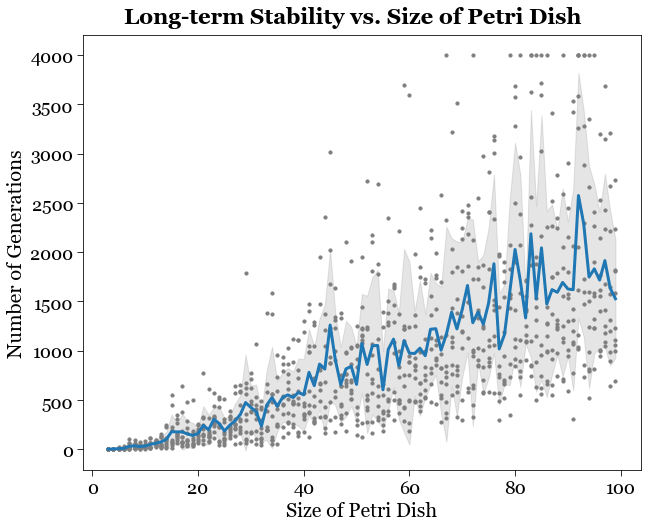

In [118]:
# plotting longevity against filling factors
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()

# Create a side-by-side bar chart
ax.scatter(all_petri_sizes, all_petri_generations, \
            marker='o', color=tableau_colors[7], s=10, \
            alpha=1)
# ax.errorbar(petri_sizes, avg_petri_generation, yerr=std_petri_generation, fmt='o', capsize=4, label="Error Bars")

y_upper = avg_petri_generation + std_petri_generation
y_lower = avg_petri_generation - std_petri_generation
# try line plot for shaded error region
ax.plot(petri_sizes, avg_petri_generation, \
            color=tableau_colors[0], linewidth=3.0, \
            alpha=1)
# Create a plot with shaded error regions
ax.fill_between(petri_sizes, y_lower, y_upper, color=tableau_colors[7], alpha=0.2, label="Error Region Y")

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
# ax.set_ylim(0, 750)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

# Customize the plot (optional)
plt.xlabel('Size of Petri Dish', fontdict=font)
plt.ylabel('Number of Generations', fontdict=font)
plt.gcf().set_facecolor('white')
fig.suptitle('Long-term Stability vs. Size of Petri Dish', fontproperties=suptitle_font, y=0.93)
# plt.xticks(x, categories)
# plt.legend(loc='upper right', prop=legend_font)

# Show the plot
plt.savefig('./plots/petri_size_generation.png')
plt.show()